# Customer Value & Revenue Optimization in Online Retail

## Table of Contents
- [1. Executive Summary](#1.-Executive-Summary)
- [2. Introduction](#2.-Introduction)
- [3. Data Preparation](#3.-Data-Preparation)
  - [3.1 Imports and Environment Setup](#3.1-Imports-and-Environment-Setup)
  - [3.2 Data Loading and Schema Validation](#3.2-Data-Loading-and-Schema-Validation)
  - [3.3 Initial Data Inspection](#3.3-Initial-Data-Inspection)
  - [3.4 Data Cleaning and Preparation](#3.4-Data-Cleaning-and-Preparation)
    - [3.4.1 Column Standardization](#3.4.1-Column-Standardization)
    - [3.4.2 Handling Missing Values](#3.4.2-Handling-Missing-Values)
    - [3.4.3 Cancellations and Returns](#3.4.3-Cancellations-and-Returns)
    - [3.4.4 Invalid Records Removal](#3.4.4-Invalid-Records-Removal)
    - [3.4.5 Feature Engineering](#3.4.5-Feature-Engineering)
  - [3.5 Final Data Quality Validation](#3.5-Final-Data-Quality-Validation)
- [4. Exploratory Data Analysis](#4.-Exploratory-Data-Analysis)
  - [4.1 Revenue Concentration and Customer Value Distribution (Pareto Curve)](#4.1-Revenue-Concentration-and-Customer-Value-Distribution-(Pareto-Curve))
  - [4.2 Customer-Level Value Distribution & Behavioral Heterogeneity](#4.2-Customer-Level-Value-Distribution-&-Behavioral-Heterogeneity)
    - [4.2.1 Distribution of Customer Revenue](#4.2.1-Distribution-of-Customer-Revenue)
    - [4.2.2 Order Frequency and Purchase Intensity](#4.2.2-Order-Frequency-and-Purchase-Intensity)
    - [4.2.3 Average Order Value (AOV) Variability](#4.2.3-Average-Order-Value-(AOV)-Variability)
    - [4.2.4 Implications for Segmentation and CLV Modelling](#4.2.4-Implications-for-Segmentation-and-CLV-Modelling)
  - [4.3 RFM-Based Customer Segmentation](#4.3-RFM-Based-Customer-Segmentation)
    - [4.3.1 RFM Metrics Construction](#4.3.1-RFM-Metrics-Construction)
    - [4.3.2 RFM Distributions](#4.3.2-RFM-Distributions)
    - [4.3.3 RFM Scoring and Customer Segmentation](#4.3.3-RFM-Scoring-and-Customer-Segmentation)
  - [4.4 Segment-Level Value, Retention Risk, and Revenue Contribution](#4.4-Segment-Level-Value,-Retention-Risk,-and-Revenue-Contribution)
    - [4.4.1 Segment Size vs Revenue Contribution](#4.4.1-Segment-Size-vs-Revenue-Contribution)
    - [4.4.2 Segment-Level Retention Risk (Recency & Churn Exposure)](#4.4.2-Segment-Level-Retention-Risk-(Recency-&-Churn-Exposure))
    - [4.4.3 Segment-Level CLV Estimation](#4.4.3-Segment-Level-CLV-Estimation)
  - [4.5 Pricing & Revenue Optimization Implications by Segment](#4.5-Pricing-&-Revenue-Optimization-Implications-by-Segment)
    - [4.5.1 Segment-Level Revenue Drivers: Frequency vs AOV](#4.5.1-Segment-Level-Revenue-Drivers:-Frequency-vs-AOV)
    - [4.5.2 Pricing Sensitivity Implications by Segment](#4.5.2-Pricing-Sensitivity-Implications-by-Segment)
    - [4.5.3 Value-Weighted Pricing Strategy Framework](#4.5.3-Value-Weighted-Pricing-Strategy-Framework)
- [5. Business Recommendations and Strategic Implementation](#5.-Business-Recommendations-and-Strategic-Implementation)
  - [5.1 Key Findings](#5.1-Key-Findings)
  - [5.2 Strategic Recommendations](#5.2-Strategic-Recommendations)
- [6. Implementation Considerations and Limitations](#6.-Implementation-Considerations-and-Limitations)
- [7. Conclusion](#7.-Conclusion)

## 1. Executive Summary

This project analyzes 1M+ transactions from a UK-based online retailer to identify how customer behavior drives revenue, churn risk, and long-term value. Using RFM-based segmentation, customer-level revenue analysis, and a behavioral CLV proxy, the analysis reveals extreme revenue concentration and material differences in engagement and retention risk across customer segments.

**Key Findings:**

 - Revenue concentration: 15% of customers (Champions) generate 62% of total revenue, creating significant dependency on a small, highly engaged customer base.

- High historical value does not translate to high future value: At-Risk customers represent £1.0M in historical revenue but face 100% churn exposure with collapsed engagement (338 days average inactivity).

- Engagement drives CLV: Champions demonstrate 20x higher CLV (£12,494) vs Hibernating (£611) through frequency (22 orders), spending power (£459 AOV), and strong recency.

- Growth opportunity exists: 1,532 Potential Loyalists show moderate engagement (4 orders, 82 days recency) with significant frequency upside.

**Business Impact:** 

The analysis identifies £1.45M+ in combined revenue preservation and incremental growth opportunities through value-weighted retention and pricing strategies. Priority interventions include: targeted At-Risk reactivation (£250K opportunity), Champions margin protection through non-price loyalty mechanisms (£545K), and frequency-focused conversion of Potential Loyalists (£500K), with additional opportunities in Loyal Customers volume growth (£150K) and New Customer activation.

This segment-specific framework enables efficient allocation of retention spend and pricing flexibility, shifting from reactive, uniform tactics to proactive, CLV-driven strategies that maximize long-term profitability. The RFM segmentation methodology, CLV estimation approach, and differentiated pricing roadmap provide an actionable foundation for immediate implementation in e-commerce environments.

## 2. Introduction

In online retail, sustainable growth depends not only on sales volume, but on understanding which customers drive the most value, how their behavior evolves over time, and which strategies can maximize long-term revenue. For retailers operating at scale, data-driven decisions around customer retention, segmentation, and pricing are essential to improving lifetime value while maintaining healthy unit economics.

This project analyzes over 1 million transaction records from a UK-based online retailer using the [Online Retail II dataset](https://archive.ics.uci.edu/dataset/502/online+retail+ii) to uncover patterns in customer purchasing behavior and translate them into actionable business insights. Using transactional records spanning December 2009 to December 2011, I build an end-to-end analytics workflow that connects customer value analysis with revenue optimization opportunities. The objective is to identify high-value customer segments, assess churn risk, and explore how pricing dynamics differ across customer groups in order to support more targeted, value-driven decision-making.

**Business Objective:**

The retailer specializes in unique, all-occasion gift products, serving both individual consumers and wholesale buyers internationally across 41 countries. Like many e-commerce businesses, they face critical resource allocation decisions around customer retention, segmentation, and pricing optimization.

The dataset contains 1,067,371 transaction records with the following features:

| Variable | Description |
|----------|-------------|
| `InvoiceNo` | Unique transaction ID (prefix 'C' indicates cancellation) |
| `StockCode` | Unique product identifier |
| `Description` | Product name |
| `Quantity` | Units purchased per transaction |
| `Price` | Price per unit (GBP) |
| `InvoiceDate` | Transaction timestamp |
| `CustomerID` | Unique customer identifier |
| `Country` | Customer's country of residence |

Using this data, the analysis addresses these challenges through two integrated components:

**1. Customer Value & Retention**
- Calculate customer lifetime value (CLV) to identify high-value customers deserving retention investment
- Segment customers using RFM analysis (Recency, Frequency, Monetary value) to enable targeted strategies
- Access churn risk using recency-based behavioral signals to identify at-risk customer groups
- Quantify revenue concentration to prioritize retention efforts

**2. Revenue Optimization Through Pricing Insights**
- Analyze price sensitivity differences across customer segments
- Test whether different segments respond differently to pricing
- Examine if uniform pricing leaves revenue opportunities on the table
- Provide segment-specific pricing recommendations

By combining customer lifetime value analysis, behavioral segmentation, and segment-level pricing insights, this project demonstrates how raw transactional data can be transformed into strategic guidance for customer retention and revenue optimization. The analysis is designed to produce:

- Clear customer segmentation with actionable retention strategies
- Quantified business impact (revenue at risk, opportunity size)
- Data-driven pricing recommendations by segment
- Decision frameworks for resource allocation and strategic prioritization

All results are presented with a focus on business impact, enabling stakeholders to make informed decisions about customer investment, retention programs, and pricing strategies that improve long-term profitability.

## 3. Data Preparation

This section loads the multi-sheet transactional dataset, validates schema consistency, resolves data quality issues, and prepares an analysis-ready dataset for customer-level analytics, segmentation, and lifetime value modeling.

### 3.1 Imports and Environment Setup

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.patches as patches

warnings.simplefilter(action='ignore', category=FutureWarning)

### 3.2 Data Loading and Schema Validation

In [2]:
# Load multi-sheet Excel dataset
file_path = "online_retail_II.xlsx"
sheet_1 = pd.read_excel(file_path, sheet_name=0)
sheet_2 = pd.read_excel(file_path, sheet_name=1)

# Validate schema consistency before merging
assert list(sheet_1.columns) == list(sheet_2.columns), "Schema mismatch detected between sheets"

# Merge sheets vertically (row-wise)
df = pd.concat([sheet_1, sheet_2], ignore_index=True)

# Save merged raw dataset as CSV
df.to_csv("online_retail_full_2009_2011.csv", index=False)

print(f"Merged dataset created: {df.shape[0]:,} rows × {df.shape[1]} columns")

Merged dataset created: 1,067,371 rows × 8 columns


### 3.3 Initial Data Inspection

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [5]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


The dataset is distributed across two Excel sheets covering different time periods. Column-level schema consistency was verified before merging to ensure no structural drift across years, successfully combining 1,067,371 transactions spanning December 2009 to December 2011. Initial inspection of the merged dataset reveals several structural and data quality considerations that inform the cleaning strategy. 

Each invoice represents a customer's shopping cart containing one or more products, meaning the dataset is structured at the line-item level rather than transaction-level. This granular structure will be aggregated to customer-level for CLV and segmentation analysis while preserving product-level detail for pricing investigations.

Customer ID coverage stands at 77% (824,364 of 1,067,371 records), with the remaining 23% missing this critical identifier. Negative quantities (minimum: -80,995) and negative prices (minimum: -£53,594) indicate the presence of returns, cancellations, or refunds that require explicit handling. Additionally, 4,382 records (0.4%) have missing product descriptions.

These observations motivate the data cleaning decisions applied in the next section, particularly the treatment of missing Customer IDs and the handling of cancellation records for customer-level analytics.

## 3.4 Data Cleaning and Preparation

This subsection addresses data quality issues identified during initial inspection, establishes clear treatment rules for missing values and cancellations, and prepares the dataset for customer-level analysis.

### 3.4.1 Column Standardization

In [6]:
# Standardize column names for consistency
df = df.rename(columns={'Customer ID': 'CustomerID'})
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'CustomerID', 'Country'],
      dtype='object')

### 3.4.2 Handling Missing Values

In [7]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
CustomerID     243007
Country             0
dtype: int64


In [8]:
# Examine missing CustomerID patterns
print(f"Total transactions: {len(df):,}")
print(f"Transactions with Customer ID: {df['CustomerID'].notna().sum():,} ({df['CustomerID'].notna().sum()/len(df)*100:.2f}%)")
print(f"Missing Customer IDs: {df['CustomerID'].isna().sum():,} ({df['CustomerID'].isna().sum()/len(df)*100:.2f}%)")

# Check if missing IDs are random or systematic
missing_id_sample = df[df['CustomerID'].isna()].head(10)
print("\nSample of transactions with missing Customer IDs:")
missing_id_sample[['Invoice', 'Description', 'Quantity', 'Price', 'Country']]

Total transactions: 1,067,371
Transactions with Customer ID: 824,364 (77.23%)
Missing Customer IDs: 243,007 (22.77%)

Sample of transactions with missing Customer IDs:


,Invoice,Description,Quantity,Price,Country
263,489464,85123a mixed,-96,0.00,United Kingdom
283,489463,short,-240,0.00,United Kingdom
284,489467,21733 mixed,-192,0.00,United Kingdom
470,489521,NaN,-50,0.00,United Kingdom
577,489525,BLUE PULL BACK RACING CAR,1,0.55,United Kingdom
578,489525,SET/6 3D KIT CARDS FOR KIDS,1,0.85,United Kingdom
1055,489548,FELTCRAFT DOLL ROSIE,1,2.95,United Kingdom
1056,489548,FELT TOADSTOOL LARGE,12,1.25,United Kingdom
1057,489548,FELTCRAFT DOLL MOLLY,3,2.95,United Kingdom
1058,489548,LARGE HEART MEASURING SPOONS,1,1.65,United Kingdom


Customer-level analysis requires valid Customer IDs for CLV calculation, segmentation, and churn prediction. Approximately 23% of transactions (243,007 records) lack this identifier and are excluded from customer analytics. However, they may still inform aggregate sales or product-level analysis and are not treated as invalid transactions.

In [9]:
# Check Description missing values
print(f"Missing Descriptions: {df['Description'].isna().sum():,} ({df['Description'].isna().sum()/len(df)*100:.2f}%)")

# Sample records with missing descriptions
missing_desc_sample = df[df['Description'].isna()].head(10)
print("\nSample records with missing descriptions:")
missing_desc_sample[['Invoice', 'StockCode', 'Quantity', 'Price', 'Country']]

Missing Descriptions: 4,382 (0.41%)

Sample records with missing descriptions:


,Invoice,StockCode,Quantity,Price,Country
470,489521,21646,-50,0.0,United Kingdom
3114,489655,20683,-44,0.0,United Kingdom
3161,489659,21350,230,0.0,United Kingdom
3731,489781,84292,17,0.0,United Kingdom
4296,489806,18010,-770,0.0,United Kingdom
4566,489821,85049G,-240,0.0,United Kingdom
6378,489882,35751C,12,0.0,United Kingdom
6555,489898,79323G,954,0.0,United Kingdom
6576,489901,21098,-200,0.0,United Kingdom
6581,489903,21166,48,0.0,United Kingdom


In [10]:
# Investigate missing description patterns
print("Missing Description Pattern Analysis:")
missing_desc = df[df['Description'].isna()]

print(f"Missing descriptions with zero price: {(missing_desc['Price'] == 0).sum():,} ({(missing_desc['Price'] == 0).sum()/len(missing_desc)*100:.1f}%)")
print(f"Missing descriptions with negative quantity: {(missing_desc['Quantity'] < 0).sum():,} ({(missing_desc['Quantity'] < 0).sum()/len(missing_desc)*100:.1f}%)")
print(f"Unique StockCodes with missing descriptions: {missing_desc['StockCode'].nunique()}")

print("\nTop countries with missing descriptions:")
missing_desc['Country'].value_counts()

Missing Description Pattern Analysis:
Missing descriptions with zero price: 4,382 (100.0%)
Missing descriptions with negative quantity: 2,689 (61.4%)
Unique StockCodes with missing descriptions: 2451

Top countries with missing descriptions:


Country
United Kingdom    4382
Name: count, dtype: int64

Missing product descriptions represent 0.4% of transactions (4,382 records). Investigation reveals a clear pattern: 100% of these records have zero prices, and 61% have negative quantities, indicating they represent special transaction types—price adjustments, promotional items, samples, or return processing entries—rather than standard product sales. All records are from the United Kingdom, suggesting systematic operational practices for these transaction types.

Since these records represent non-revenue transactions (zero price) and will be filtered during invalid record removal (Section 3.3), the missing descriptions do not impact customer-level analysis. They are retained in the raw dataset for transparency but will naturally be excluded from CLV calculations and revenue analysis.

In [11]:
# Create customer-level dataset (exclude missing IDs)
df_customers = df[df['CustomerID'].notna()].copy()
print(f"Customer-level dataset: {len(df_customers):,} transactions from {df_customers['CustomerID'].nunique():,} unique customers")

Customer-level dataset: 824,364 transactions from 5,942 unique customers


### 3.4.3 Cancellations and Returns

In [12]:
# Identify cancellations (Invoice starts with 'C')
df_customers['IsCancellation'] = df_customers['Invoice'].astype(str).str.startswith('C')
print(f"Cancellations: {df_customers['IsCancellation'].sum():,} {df_customers['IsCancellation'].sum()/len(df_customers)*100:.1f}%)")

# Check negative quantities
print(f"Negative quantities: {(df_customers['Quantity'] < 0).sum():,}")
print(f"Negative prices: {(df_customers['Price'] < 0).sum():,}")

Cancellations: 18,744 2.3%)
Negative quantities: 18,744
Negative prices: 0


Cancellations are explicitly marked by invoice codes starting with 'C', representing returns or refunds. These will be handled separately rather than removed entirely, as they provide valuable information about customer behavior and product issues. Baseline CLV calculations will be performed on completed purchase transactions, with cancellations analyzed separately as a churn signal.

In [13]:
# Separate valid transactions from cancellations
df_valid = df_customers[~df_customers['IsCancellation']].copy()
df_cancelled = df_customers[df_customers['IsCancellation']].copy()

print(f"Valid transactions: {len(df_valid):,}")
print(f"Cancelled transactions: {len(df_cancelled):,}")

Valid transactions: 805,620
Cancelled transactions: 18,744


### 3.4.4 Invalid Records Removal

In [14]:
# Remove records with zero or negative prices (excluding cancellations already handled)
print(f"Records with zero/negative prices: {(df_valid['Price'] <= 0).sum():,}")
df_valid = df_valid[df_valid['Price'] > 0].copy()

# Remove records with zero quantity (invalid orders)
print(f"Records with zero quantity: {(df_valid['Quantity'] == 0).sum():,}")
df_valid = df_valid[df_valid['Quantity'] > 0].copy()

print(f"\nCleaned dataset: {len(df_valid):,} transactions")

Records with zero/negative prices: 71
Records with zero quantity: 0

Cleaned dataset: 805,549 transactions


### 3.4.5 Feature Engineering

In [15]:
# InvoiceDate is already in datetime in the original dataset; no need for conversion

# Create TotalAmount (revenue per line item)
df_valid['TotalAmount'] = df_valid['Quantity'] * df_valid['Price']

# Extract temporal features for later analysis
df_valid['Year'] = df_valid['InvoiceDate'].dt.year
df_valid['Month'] = df_valid['InvoiceDate'].dt.month
df_valid['YearMonth'] = df_valid['InvoiceDate'].dt.to_period('M')
df_valid['Weekday'] = df_valid['InvoiceDate'].dt.day_name()

# Preview cleaned dataset
print("Cleaned dataset preview:")
df_valid.head()

Cleaned dataset preview:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,IsCancellation,TotalAmount,Year,Month,YearMonth,Weekday
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,False,83.4,2009,12,2009-12,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,False,81.0,2009,12,2009-12,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,False,81.0,2009,12,2009-12,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,False,100.8,2009,12,2009-12,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,False,30.0,2009,12,2009-12,Tuesday


After applying data quality filters and feature engineering, negative prices observed during initial inspection were associated with cancellation records and were excluded prior to this step. Remaining non-positive prices represent zero-valued line items. The analysis-ready dataset now contains 805,549 valid transactions spanning 5,942 unique customers. Each record now includes computed revenue (TotalAmount) and temporal features that will support cohort analysis, retention tracking, and seasonal pattern investigation. Cancellation records are preserved separately for potential churn signal analysis but excluded from baseline revenue calculations.

## 3.5 Final Data Quality Validation

In [16]:
# Verify no missing critical fields
print("Missing values after cleaning:")
print(df_valid[['CustomerID', 'Invoice', 'Quantity', 'Price', 'TotalAmount', 'InvoiceDate']].isnull().sum())

# Summary statistics on cleaned data
print("\nCleaned dataset statistics:")
df_valid[['Quantity', 'Price', 'TotalAmount']].describe()

Missing values after cleaning:
CustomerID     0
Invoice        0
Quantity       0
Price          0
TotalAmount    0
InvoiceDate    0
dtype: int64

Cleaned dataset statistics:


,Quantity,Price,TotalAmount
count,805549.000000,805549.000000,805549.000000
mean,13.290522,3.206561,22.026505
std,143.634088,29.199173,224.041928
min,1.000000,0.001000,0.001000
25%,2.000000,1.250000,4.950000
50%,5.000000,1.950000,11.850000
75%,12.000000,3.750000,19.500000
max,80995.000000,10953.500000,168469.600000


In [17]:
# Save cleaned dataset
df_valid.to_csv("online_retail_cleaned.csv", index=False)
print("Cleaned dataset saved as 'online_retail_cleaned.csv'")

Cleaned dataset saved as 'online_retail_cleaned.csv'


The cleaned dataset passes validation with no missing values in critical fields (CustomerID, revenue, timestamps). Statistical distributions confirm realistic ranges: all quantities are positive, all prices are positive, with median transaction value of £11.85. The presence of high variance in quantities (max: 80,995) and prices (max: £10,953.50) reflects the mix of retail and wholesale purchasing behavior in the customer base.

The line-item structure preserves granular product-level detail while enabling customer-level aggregation. Each invoice represents a shopping cart potentially containing multiple products, requiring aggregation by Invoice and CustomerID for 
revenue and behavioral metrics. The final dataset of 805,549 transactions from 5,942 unique customers is now ready for exploratory analysis, customer segmentation, and lifetime value calculation.

With data quality issues resolved and consistent customer identifiers established, the next section explores exploratory patterns in customer behavior, revenue concentration, and purchasing dynamics.

## 4. Exploratory Data Analysis

This section examines revenue distribution, customer purchasing behavior, and temporal dynamics to validate the assumptions underlying customer lifetime value modeling, segmentation, and pricing analysis. The goal is not to optimize yet, but to establish whether meaningful behavioral and economic patterns exist in the data.

In [18]:
# Aggregate revenue at customer level
customer_revenue = (
    df_valid
    .groupby('CustomerID')
    .agg(
        total_revenue=('TotalAmount', 'sum'),
        total_orders=('Invoice', 'nunique'),
        total_items=('Quantity', 'sum'),
        avg_order_value=('TotalAmount', 'mean')
    )
    .reset_index()
)

customer_revenue.describe()

,CustomerID,total_revenue,total_orders,total_items,avg_order_value
count,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000
mean,15315.313542,3018.616737,6.289384,1821.396223,48.299996
std,1715.572666,14737.731040,13.009406,8963.011855,780.177864
min,12346.000000,2.950000,1.000000,1.000000,2.042182
25%,13833.250000,348.762500,1.000000,190.000000,11.470705
50%,15314.500000,898.915000,3.000000,491.500000,17.354064
75%,16797.750000,2307.090000,7.000000,1376.000000,24.195021
max,18287.000000,608821.650000,398.000000,367193.000000,56157.500000


Customer-level aggregation reveals a highly skewed revenue distribution. The median customer generates £899 across 3 orders, while top customers exceed £600,000 across hundreds of transaction—indicating coexistence of retail and wholesale purchasing behaviors.

This heterogeneity supports the need for customer segmentation, lifetime value modeling, and differentiated strategies rather than uniform customer treatment. The following analysis quantifies this concentration pattern using Pareto curves.

### 4.1 Revenue Concentration and Customer Value Distribution (Pareto Curve)

This section examines how total revenue is distributed across the customer base to assess concentration risk and identify the relative importance of high-value customers. A Pareto (cumulative distribution) curve is used to visualize the relationship between the share of customers and the share of total revenue they generate.

In [19]:
# Sort customers by revenue
customer_revenue_sorted = customer_revenue.sort_values(by='total_revenue', ascending=False).reset_index(drop=True)

# Cumulative revenue share
customer_revenue_sorted['cumulative_revenue'] = (customer_revenue_sorted['total_revenue'].cumsum())
customer_revenue_sorted['cumulative_percent'] = (
    customer_revenue_sorted['cumulative_revenue'] / 
    customer_revenue_sorted['total_revenue'].sum()
)
# Display first 10 rows
customer_revenue_sorted.head(10)

,CustomerID,total_revenue,total_orders,total_items,avg_order_value,cumulative_revenue,cumulative_percent
0,18102.0,608821.65,145,188340,575.445794,608821.65,0.034313
1,14646.0,528602.52,151,367193,137.335027,1137424.17,0.064104
2,14156.0,313946.37,156,165992,77.555921,1451370.54,0.081798
3,14911.0,295972.63,398,149987,26.320376,1747343.17,0.098478
4,17450.0,246973.09,51,84720,582.483703,1994316.26,0.112397
5,13694.0,196482.81,143,189205,128.841187,2190799.07,0.123471
6,17511.0,175603.55,60,119656,91.890921,2366402.62,0.133368
7,16446.0,168472.50,2,80997,56157.500000,2534875.12,0.142863
8,16684.0,147142.77,55,104810,204.934220,2682017.89,0.151156
9,12415.0,144458.37,28,91447,156.002559,2826476.26,0.159297


In [20]:
customer_revenue_sorted['cumulative_revenue_percent'] = (
    customer_revenue_sorted['cumulative_revenue'] / 
    customer_revenue_sorted['total_revenue'].sum()
) * 100

customer_revenue_sorted['customer_percent'] = (
    (customer_revenue_sorted.index + 1) / len(customer_revenue_sorted)
) * 100

# Find 80% revenue threshold
threshold_80 = customer_revenue_sorted[customer_revenue_sorted['cumulative_revenue_percent'] >= 80].iloc[0]
customers_for_80_revenue = threshold_80['customer_percent']

# Calculate revenue % for top 20% of customers
top_20_revenue_pct = customer_revenue_sorted[
    customer_revenue_sorted['customer_percent'] <= 20
]['cumulative_revenue_percent'].iloc[-1]

# Translate percentages to actual customer counts
total_customers = len(customer_revenue_sorted)
top_20_pct_customers = int(total_customers * 0.20)
customers_for_80_pct_revenue = int(total_customers * customers_for_80_revenue / 100)

print(f"Top {top_20_pct_customers:,} customers (20%) generate {top_20_revenue_pct:.2f}% of revenue")
print(f"Top {customers_for_80_pct_revenue:,} customers ({customers_for_80_revenue:.2f}%) generate 80% of revenue")

Top 1,175 customers (20%) generate 77.24% of revenue
Top 1,353 customers (23.02%) generate 80% of revenue


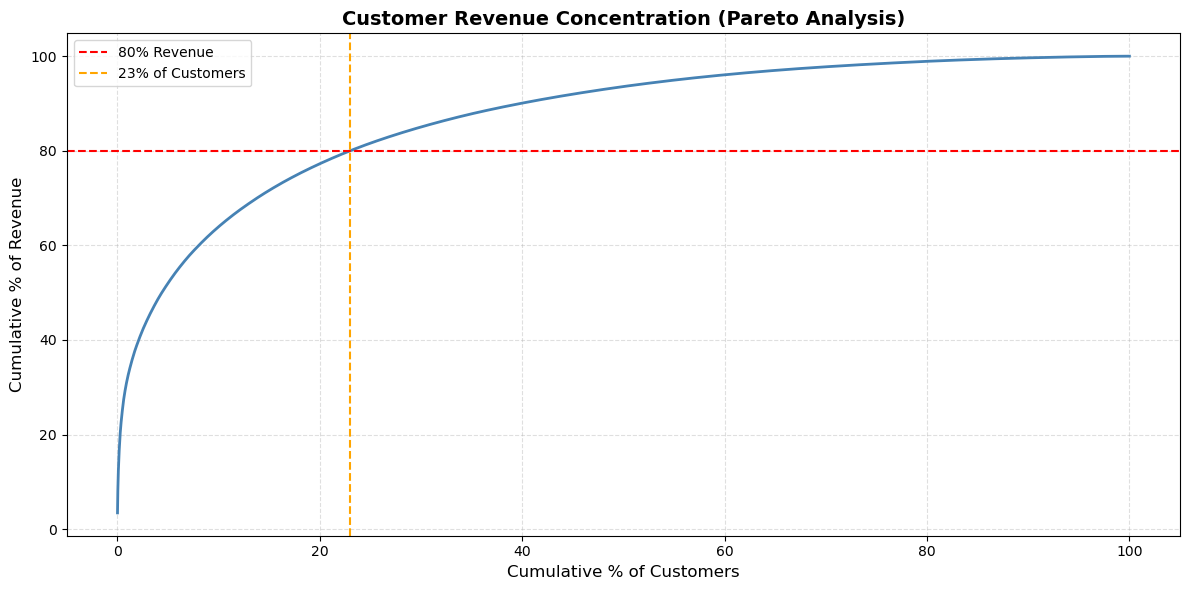

In [21]:
# Pareto chart
plt.figure(figsize=(12, 6))

sns.lineplot(data=customer_revenue_sorted, x='customer_percent', y='cumulative_revenue_percent',
             linewidth=2, color='steelblue')

plt.axhline(80, color='red', linestyle='--', label='80% Revenue')
plt.axvline(customers_for_80_revenue, color='orange', linestyle='--',
            label=f'{customers_for_80_revenue:.0f}% of Customers')

plt.xlabel('Cumulative % of Customers', fontsize=12)
plt.ylabel('Cumulative % of Revenue', fontsize=12)
plt.title('Customer Revenue Concentration (Pareto Analysis)', fontsize=14, fontweight='bold')
plt.grid(True, ls="--", alpha=0.4)

plt.legend()
plt.tight_layout()
plt.show()

The Pareto curve shows a strong revenue concentration among a small customer subset. Approximately 23% of customers (1,353 of 5,878) generate 80% of total revenue, while the top 20% (1,176 customers) alone contribute 77%. This near-classic Pareto distribution indicates that a relatively small group of high-value customers drives the majority of business performance.

This level of concentration validates the need for customer lifetime value modeling and targeted retention strategies. Treating all customers equally would result in inefficient resource allocation and elevated risk of revenue loss from high-value customer churn. The segmentation analysis in further steps will formalize these customer tiers and enable differentiated engagement strategies.

### 4.2 Customer-Level Value Distribution & Behavioral Heterogeneity

Having established that revenue is highly concentrated among a small subset of customers, this section examines the full distribution of customer-level revenue, order frequency, and purchasing patterns to assess whether average customer metrics are representative or misleading. By analyzing these behavioral dimensions, we determine whether customer heterogeneity justifies segmentation-based strategies.

### 4.2.1 Distribution of Customer Revenue

This subsection examines how customer revenue is distributed across the customer base in order to assess whether the "average customer" meaningfully represents typical purchasing behavior. This directly deepens the Pareto insight from Section 4.1.

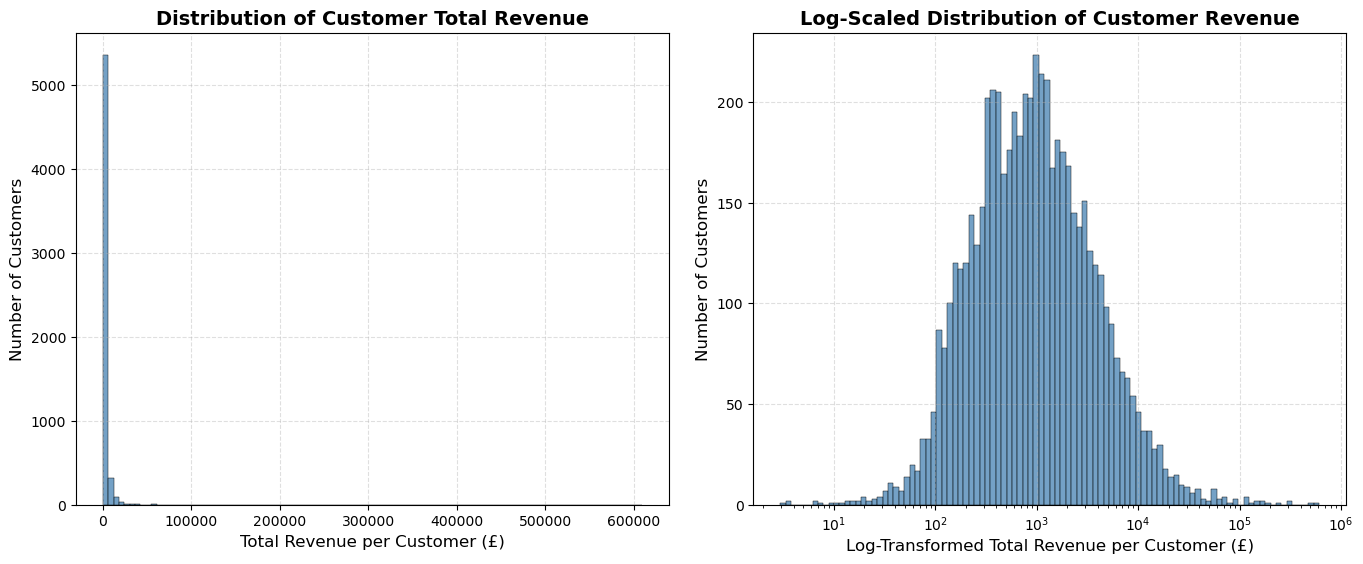

In [22]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Distribution of Customer Total Revenue
sns.histplot(customer_revenue, x='total_revenue', bins=100, color='steelblue', ax=axes[0])
axes[0].set_xlabel('Total Revenue per Customer (£)', fontsize=12)
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].set_title('Distribution of Customer Total Revenue', fontsize=14, fontweight='bold')
axes[0].grid(True, ls='--', alpha=0.4)

# Plot 2: Log-Scaled Distribution of Customer Revenue
sns.histplot(customer_revenue, x='total_revenue', bins=100, log_scale=True, color='steelblue', ax=axes[1])
axes[1].set_xlabel('Log-Transformed Total Revenue per Customer (£)', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].set_title('Log-Scaled Distribution of Customer Revenue', fontsize=14, fontweight='bold')
axes[1].grid(True, ls='--', alpha=0.4)

plt.tight_layout(pad=2)
plt.show()

Customer revenue exhibits a highly right-skewed distribution, with a small number of customers generating disproportionately large revenue while the majority contribute relatively modest amounts. Extreme high-value outliers dominate the raw distribution, compressing the majority of customers near the lower end of the scale and making average-based metrics misleading for decision-making.

Applying a logarithmic transformation reveals clearer structure within the customer base, indicating substantial heterogeneity in customer value. This confirms that the "average customer" is not representative of typical behavior, as mean revenue is significantly inflated by a small number of very high-spending customers.

These findings reinforce the need for customer segmentation and lifetime value modeling. Treating customers uniformly would obscure meaningful differences in purchasing behavior and lead to inefficient targeting and retention strategies.

In [23]:
# Quantify distribution characteristics
print("Customer Revenue Statistics:")
print(f"Mean: £{customer_revenue['total_revenue'].mean():,.2f}")
print(f"Median: £{customer_revenue['total_revenue'].median():,.2f}")
print(f"Std Dev: £{customer_revenue['total_revenue'].std():,.2f}")
print(f"Skewness: {customer_revenue['total_revenue'].skew():.2f}")

Customer Revenue Statistics:
Mean: £3,018.62
Median: £898.91
Std Dev: £14,737.73
Skewness: 25.31


The statistics confirm the extreme right skewness visible in the distribution. The mean revenue (£3,019) is 3.4 times higher than median (£899), with a skewness coefficient of 25.3. The massive standard deviation (£14,738) relative to the median further demonstrates that the "average customer" is not representative, as the mean is heavily inflated by a small number of very high-value outliers.

### 4.2.2 Order Frequency and Purchase Intensity

Having established substantial heterogeneity in customer revenue, we now examine how purchasing behavior differs across customers in terms of order frequency and purchase intensity. Specifically, we analyze how often customers place orders and how many items they purchase in total, in order to distinguish between frequent buyers, high-volume buyers, and occasional purchasers.

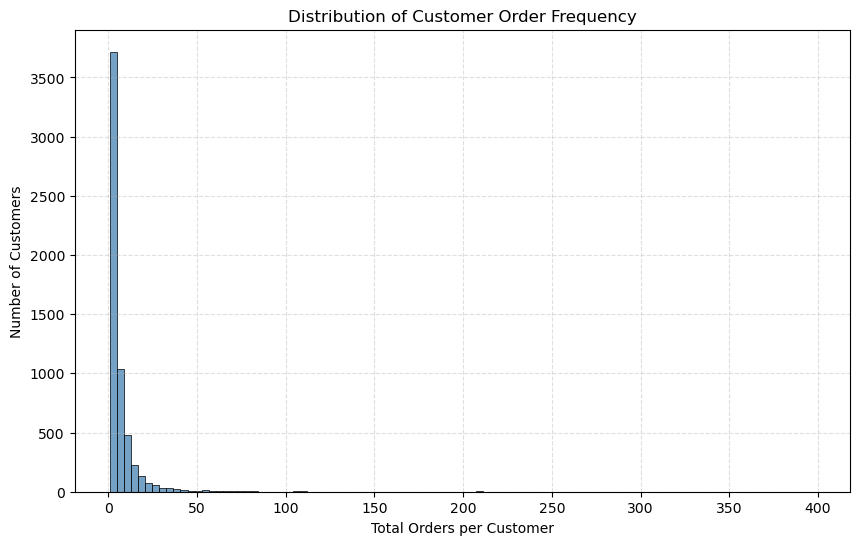

In [24]:
# Distribution of order frequency
plt.figure(figsize=(10, 6))
sns.histplot(customer_revenue, x='total_orders', bins=100, color='steelblue')
plt.xlabel('Total Orders per Customer')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Order Frequency')
plt.grid(True, ls='--', alpha=0.4)
plt.show()

Customer order frequency is highly right-skewed. Most customers place only a small number of orders, while a small subset exhibits very high purchase frequency. This indicates that repeat purchasing behavior is concentrated among a limited portion of the customer base.

The presence of customers with exceptionally high order counts suggests that loyalty and repeat engagement play a significant role in driving total revenue, reinforcing the importance of retention-focused strategies.

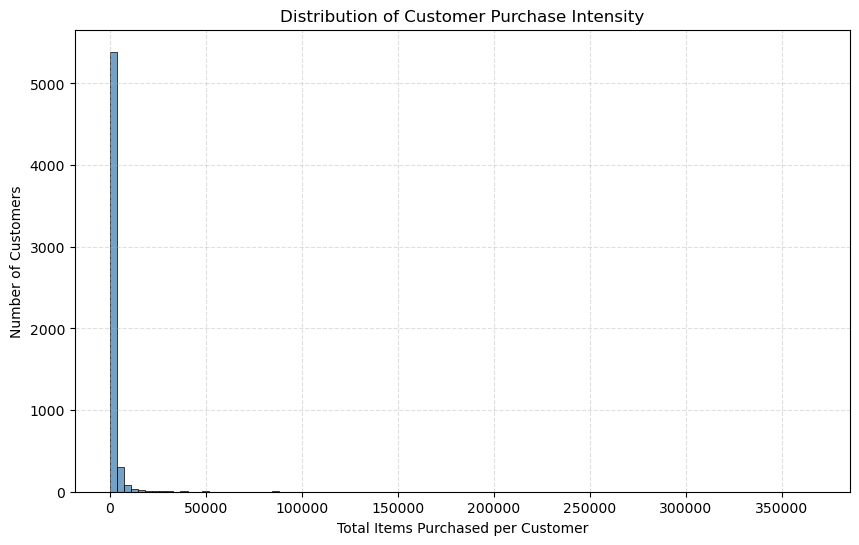

In [25]:
# Distribution of purchase intensity (Total items)
plt.figure(figsize=(10, 6))
sns.histplot(customer_revenue, x='total_items', bins=100, color='steelblue')
plt.xlabel('Total Items Purchased per Customer')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Purchase Intensity')
plt.grid(True, ls='--', alpha=0.4)
plt.show()

Total items purchased per customer also exhibit a highly skewed distribution, with most customers purchasing relatively few items overall and a small number of customers purchasing extremely large volumes.

This pattern suggests the coexistence of distinct customer behaviors, including low-volume occasional buyers, frequent moderate buyers, and high-volume purchasers likely associated with wholesale or bulk purchasing pattern, which is consistent with the retailer's mixed B2C/B2B customer base.

In [26]:
# Quantify order frequency patterns
print("Order Frequency Statistics:")
print(f"Mean orders: {customer_revenue['total_orders'].mean():.1f}")
print(f"Median orders: {customer_revenue['total_orders'].median():.0f}")
print(f"Max orders: {customer_revenue['total_orders'].max():.0f}")

Order Frequency Statistics:
Mean orders: 6.3
Median orders: 3
Max orders: 398


The median customer places 3 orders, while the mean is 6.3 orders—a 2.1 times ratio indicating moderate skew. The maximum of 398 orders demonstrates that repeat purchasing behavior is concentrated among a limited portion of the customer base, with exceptional loyalty exhibited by top customers.

Overall, these distributions indicate that high customer revenue can arise through different behavioral pathways. Some customers generate value through frequent repeat purchases, while others contribute disproportionately through large-volume transactions. As a result, revenue alone does not fully explain customer importance; understanding the underlying purchasing behavior is essential for effective segmentation and lifetime value modeling, as similar revenue levels can emerge from fundamentally different purchasing behaviors, which have distinct implications for retention, pricing, and lifetime value.

### 4.2.3 Average Order Value (AOV) Variability

Having established that high revenue arises through different behavioral pathways—including high purchasing frequency and high purchase volume—this section isolates the third critical lever: how much customers spend per order (Average Order Value). 

AOV analysis is essential because high revenue does not equate to high AOV. Pricing and promotion strategies act directly on AOV, making it critical for distinguishing retail versus wholesale purchasing dynamics. We examine the raw AOV distribution and its log-transformed structure:

We begin by examining the raw distribution of AOV, followed by a log-scaled transformation to better understand its underlying structure:

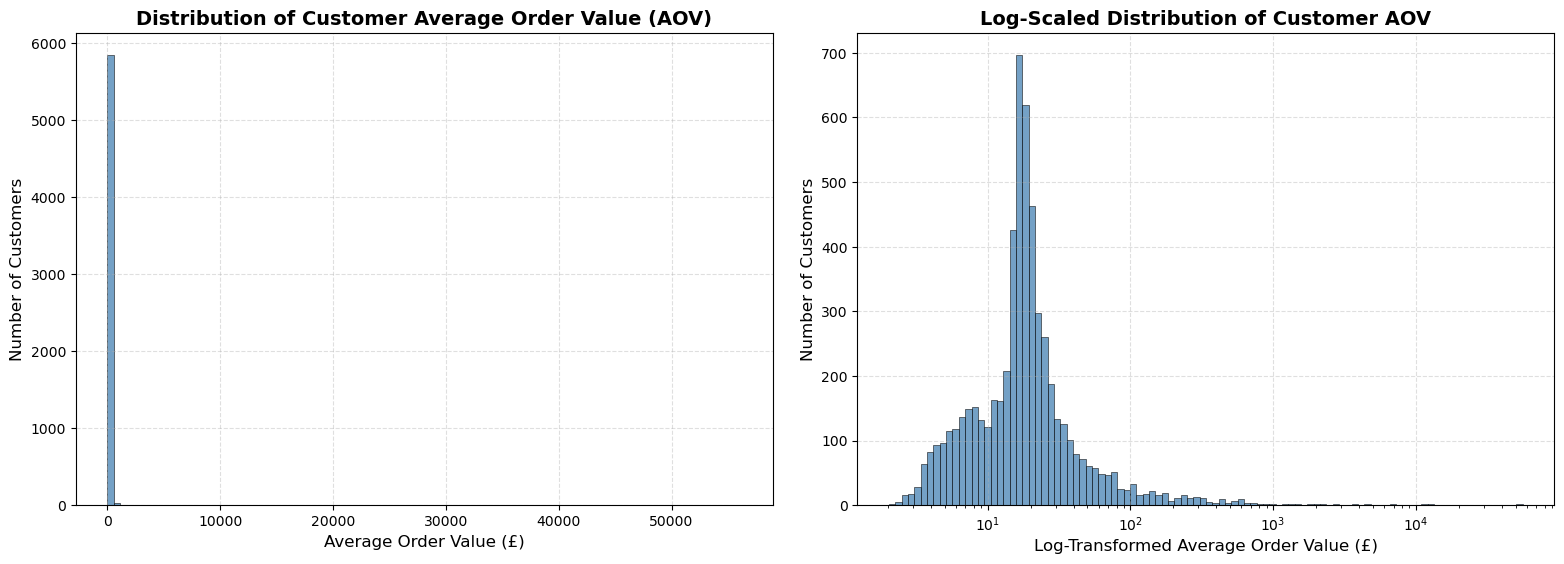

In [27]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Distribution of Average Order Value (AOV)
ax1=sns.histplot(customer_revenue, x='avg_order_value', bins=100, color='steelblue', ax=axes[0])
ax1.set_xlabel('Average Order Value (£)', fontsize=12)
ax1.set_ylabel('Number of Customers', fontsize=12)
ax1.set_title('Distribution of Customer Average Order Value (AOV)', fontsize=14, fontweight='bold')
ax1.grid(True, ls='--', alpha=0.4)

# Plot 2: Log-scaled AOV distribution
ax2=sns.histplot(customer_revenue, x='avg_order_value', bins=100, log_scale=True, color='steelblue', ax=axes[1])
ax2.set_xlabel('Log-Transformed Average Order Value (£)', fontsize=12)
ax2.set_ylabel('Number of Customers', fontsize=12)
ax2.set_title('Log-Scaled Distribution of Customer AOV', fontsize=14, fontweight='bold')
ax2.grid(True, ls='--', alpha=0.4)

plt.tight_layout(pad=2)
plt.show()

The distribution of average order value (AOV) is highly right-skewed, with most customers exhibiting relatively low average spend per order and a small number of customers displaying exceptionally high AOV values.

The presence of extreme outliers inflates the mean AOV, indicating that the "average order" is not representative of typical purchasing behavior. This suggests that pricing decisions based solely on aggregate averages may be misleading.

Applying a logarithmic transformation reveals a clearer structure in customer spending behavior. The log-scaled AOV distribution highlights substantial dispersion across customers, confirming that order values vary meaningfully even among customers with similar total revenue or order frequency.

This heterogeneity indicates that some customers generate value through frequent low-value orders, while others contribute through infrequent but high-value purchases. These distinct patterns have direct implications for pricing, discounting, and promotional strategy design.

In [28]:
# Quantify AOV distribution
print("Average Order Value Statistics:")
print(f"Mean AOV: £{customer_revenue['avg_order_value'].mean():.2f}")
print(f"Median AOV: £{customer_revenue['avg_order_value'].median():.2f}")
print(f"Max AOV: £{customer_revenue['avg_order_value'].max():,.2f}")

Average Order Value Statistics:
Mean AOV: £48.30
Median AOV: £17.35
Max AOV: £56,157.50


The mean AOV (£48.30) is 2.8 times higher than the median (£17.35), with maximum reaching £56,158. This dispersion indicates that some customers generate value through frequent low-value orders (retail behavior), while others contribute through infrequent but extremely high-value purchases (wholesale behavior). These distinct patterns have direct implications for pricing and promotional strategy design.

Taken together, revenue, order frequency, purchase intensity, and AOV analyses demonstrate that customer value is multi-dimensional. High-value customers cannot be identified by revenue alone, as similar revenue outcomes may arise from fundamentally different behavioral profiles.

These findings reinforce the need for customer segmentation frameworks that jointly consider recency, frequency, monetary value, and purchasing structure. In the next section, we formalize these insights through RFM-based customer segmentation to translate behavioral heterogeneity into actionable customer groups.

### 4.2.4 Implications for Segmentation and CLV Modeling

The preceding analyses demonstrate that customer value in this online retail setting is highly heterogeneous and multi-dimensional. Revenue concentration analysis (Section 4.1) revealed that a small fraction of customers accounts for a disproportionate share of total revenue, while the majority contribute relatively modest value. Subsequent examination of customer-level revenue, order frequency, purchase intensity, and average order value confirms that there is no single "typical" customer.

Importantly, similar revenue outcomes arise through distinct behavioral pathways. Some customers generate high lifetime value through frequent repeat purchases with moderate order sizes, while others contribute comparable revenue through infrequent but high-value or high-volume transactions. Average order value alone is therefore insufficient to characterize customer importance, just as revenue alone obscures meaningful differences in purchasing behavior.

These findings have direct implications for customer strategy. Treating all customers uniformly—using aggregate averages or one-size-fits-all retention and pricing policies—would lead to inefficient resource allocation and sub-optimal decision-making. High-value customers differ not only in how much they spend, but in how and when they spend, which directly affects churn risk, responsiveness to promotions, and long-term profitability.

To translate this behavioral heterogeneity into actionable insights, a structured segmentation framework is required. In particular, customer value must be decomposed along multiple dimensions capturing:

- Recency of engagement (how recently a customer has purchased)

- Frequency of transactions (how often they purchase)

- Monetary value (how much they spend)

Together, these dimensions provide a principled basis for distinguishing loyal customers, high-potential customers, at-risk customers, and low-engagement segments. This motivates the use of RFM-based customer segmentation as a foundation for customer lifetime value analysis and targeted retention and pricing strategies.

In the next section, we formalize these insights by constructing Recency, Frequency, and Monetary metrics at the customer level and using them to segment the customer base into behaviorally meaningful groups.

### 4.3 RFM-Based Customer Segmentation

Exploratory analysis has shown that customer value is highly heterogeneous and cannot be captured by revenue alone. Customers differ meaningfully in recency of engagement, purchase frequency, and monetary contribution, leading to distinct behavioral profiles with different retention and revenue implications.

This section formalizes these behavioral differences by constructing Recency, Frequency, and Monetary (RFM) metrics at the customer level and using them to segment customers into actionable groups. The goal is to translate observed behavioral heterogeneity into interpretable customer segments that can support targeted retention, pricing, and lifetime value strategies.

### 4.3.1 RFM Metrics Construction

RFM metrics are time-dependent. Recency is measured as the number of days since a customer's most recent purchase relative to a fixed snapshot date. Frequency captures the number of completed distinct purchase invoices, while Monetary value reflects total customer revenue over the observation period. Together, these metrics summarize both engagement intensity and economic contribution.

Recency must be measured relative to a clearly defined reference point, typically one day after the final observed transaction. This ensures all customers have strictly positive recency values and enables meaningful comparison of engagement across the 
customer base.

In [29]:
# Define snapshot date (one day after last transaction)
snapshot_date = df_valid['InvoiceDate'].max() + pd.Timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [30]:
# Construct RFM metrics at customer level
rfm = (
    df_valid
    .groupby('CustomerID')
    .agg(
        Recency=('InvoiceDate', lambda x: (snapshot_date - x.max()).days),
        Frequency=('Invoice', 'nunique'),
        Monetary=('TotalAmount', 'sum')
    )
    .reset_index()
)

rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,12,77556.46
1,12347.0,2,8,5633.32
2,12348.0,75,5,2019.40
3,12349.0,19,4,4428.69
4,12350.0,310,1,334.40


In [31]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,5878.000000,5878.000000,5878.000000,5878.000000
mean,15315.313542,201.331916,6.289384,3018.616737
std,1715.572666,209.338707,13.009406,14737.731040
min,12346.000000,1.000000,1.000000,2.950000
25%,13833.250000,26.000000,1.000000,348.762500
50%,15314.500000,96.000000,3.000000,898.915000
75%,16797.750000,380.000000,7.000000,2307.090000
max,18287.000000,739.000000,398.000000,608821.650000


The constructed RFM table summarizes customer behavior across three complementary dimensions: engagement recency, purchase frequency, and total monetary contribution. Recency captures how recently customers have interacted with the platform, while frequency and monetary value reflect repeat purchasing behavior and revenue generation respectively. Frequency in particular serves as a proxy for customer loyalty and engagement depth.

As expected from earlier exploratory analysis, frequency and monetary values exhibit substantial dispersion, confirming that customer engagement and value are highly heterogeneous. These characteristics validate the use of RFM-based segmentation to distinguish between customers who appear similar in aggregate revenue but differ meaningfully in underlying behavior.

This RFM representation now provides a structured foundation for customer scoring, segmentation, and downstream lifetime value modeling.

### 4.3.2 RFM Distributions

Before converting RFM metrics into scores or segments, it is critical to understand their raw distributions, as skewness and heavy tails directly affect scoring thresholds. RFM variables are almost never normally distributed; they tend to be skewed, heavy-tailed, and heterogeneous, which directly affects how scoring thresholds should be defined. This step ensures that subsequent segmentation decisions are data-driven rather than arbitrary.

**Distribution of Recency** reveals how recently customers are engaging, identifies whether inactivity is widespread or concentrated and helps distinguish active, dormant, and churn-risk customers.

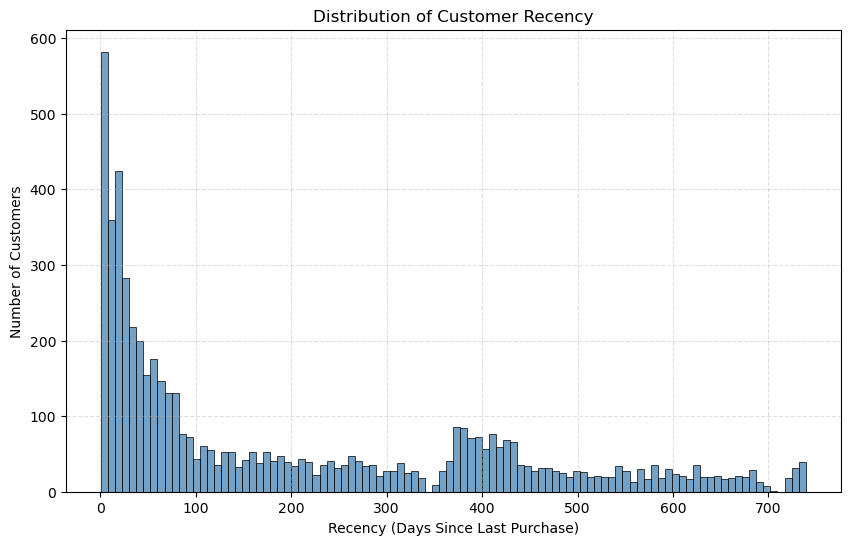

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(rfm['Recency'], bins=100, color='steelblue')
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Recency')
plt.grid(True, ls='--', alpha=0.4)
plt.show()

Customer recency exhibits a right-skewed distribution, with a substantial portion of customers having not made a purchase for extended periods. Lower recency values indicate more recent engagement, while higher values reflect longer periods of inactivity. While some customers remain recently active, a long tail of higher recency values indicates a sizable inactive or at-risk customer base.

This pattern suggests that engagement decay is uneven across customers and that recency will be a critical discriminator in downstream segmentation and churn-risk identification.

**Distribution of Frequency** distinguishes one-time buyers from repeat customers, separates habitual purchasers from occasional buyers and prevents over-weighting "average frequency".

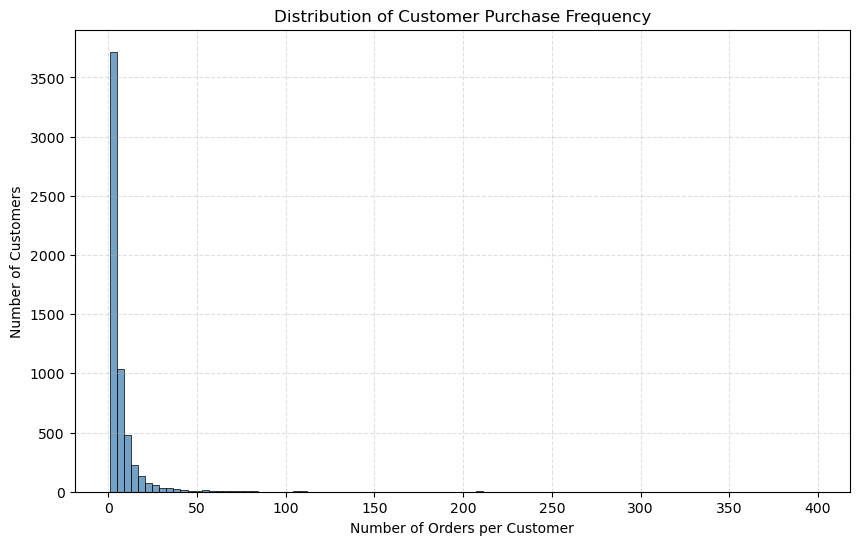

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(rfm['Frequency'], bins=100, color='steelblue')
plt.xlabel('Number of Orders per Customer')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Purchase Frequency')
plt.grid(True, ls='--', alpha=0.4)
plt.show()

Purchase frequency is highly right-skewed. Most customers place only a small number of orders, while a small subset exhibits very high repeat purchasing behavior.

This confirms that customer engagement intensity varies substantially and that frequency is a key driver of long-term value for a minority of highly engaged customers.

**Distribution of Monetary Value** identifies revenue concentration, exposes wholesale vs retail dynamics and reinforces why segmentation is necessary.

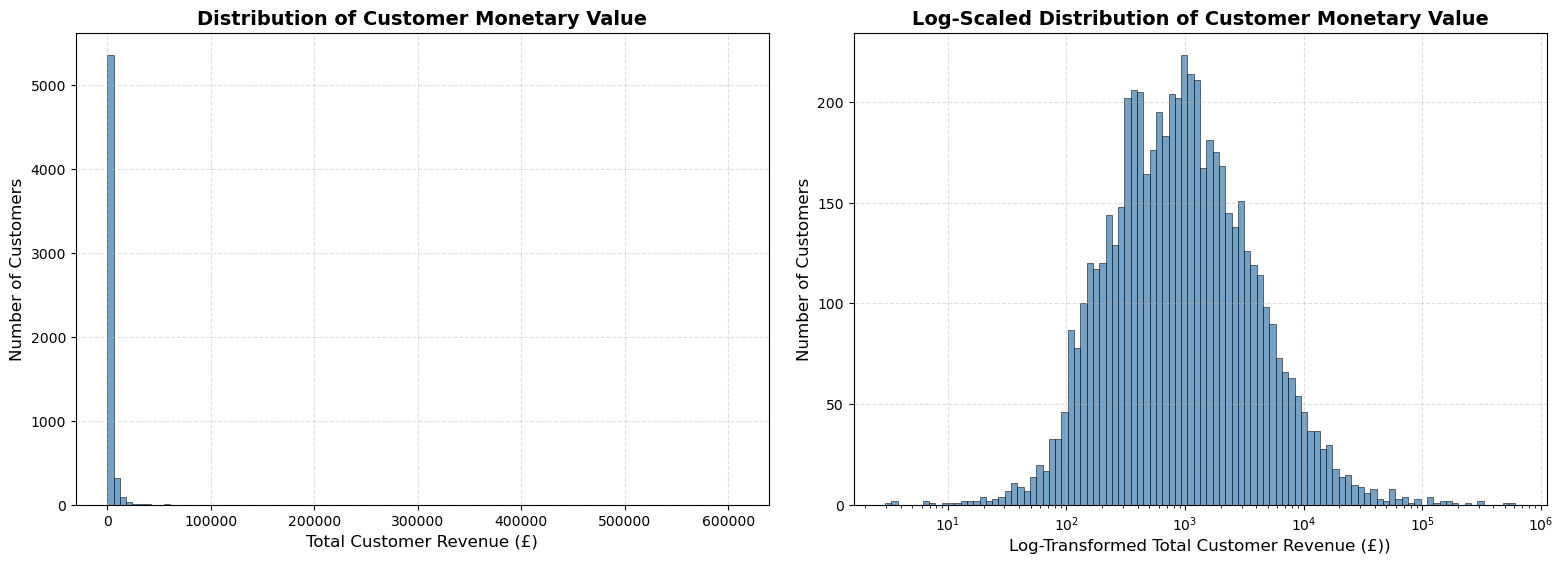

In [34]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Distribution of Customer Monetary Value
ax1=sns.histplot(rfm, x='Monetary', bins=100, color='steelblue', ax=axes[0])
ax1.set_xlabel('Total Customer Revenue (£)', fontsize=12)
ax1.set_ylabel('Number of Customers', fontsize=12)
ax1.set_title('Distribution of Customer Monetary Value', fontsize=14, fontweight='bold')
ax1.grid(True, ls='--', alpha=0.4)

# Plot 2: Log-Scaled Distribution of Customer Monetary Value
ax2=sns.histplot(rfm, x='Monetary', bins=100, log_scale=True, color='steelblue', ax=axes[1])
ax2.set_xlabel('Log-Transformed Total Customer Revenue (£))', fontsize=12)
ax2.set_ylabel('Number of Customers', fontsize=12)
ax2.set_title('Log-Scaled Distribution of Customer Monetary Value', fontsize=14, fontweight='bold')
ax2.grid(True, ls='--', alpha=0.4)

plt.tight_layout(pad=2)
plt.show()

Monetary value is extremely right-skewed, with a small number of customers contributing disproportionately large revenue. The log-scaled distribution reveals clearer structure, indicating meaningful tiers of customer value rather than a continuous gradient. Log-scaled views are used to reveal structure obscured by extreme outliers in raw distributions.

This reinforces earlier Pareto findings and highlights the importance of combining monetary value with engagement metrics to avoid over-reliance on revenue alone.

Taken together, the distributions of recency, frequency, and monetary value confirm that customer behavior is highly heterogeneous across all dimensions. None of the RFM metrics follow a normal distribution, and each exhibits substantial skewness and dispersion.

These characteristics indicate that simple averages are misleading and that segmentation must rely on relative positioning (e.g., quantiles or ranks) rather than absolute thresholds. This motivates the transformation of raw RFM values into standardized scores in the next step.

### 4.3.3 RFM Scoring and Customer Segmentation

The exploratory analysis showed that Recency, Frequency, and Monetary values are highly skewed and heterogeneous, making raw values unsuitable for direct comparison or rule-based segmentation.

To enable fair comparison across customers and construct interpretable segments, we transform raw RFM metrics into relative scores (1-5) using quantile-based ranking. This approach preserves ordinal relationships while mitigating the influence of 
extreme outliers.

In [35]:
# Copy RFM table to avoid mutation
rfm_scored = rfm.copy()

# Create quantile-based bins
rfm_scored['R_bin'] = pd.qcut(rfm_scored['Recency'], q=5, duplicates='drop')
rfm_scored['F_bin'] = pd.qcut(rfm_scored['Frequency'], q=5, duplicates='drop')
rfm_scored['M_bin'] = pd.qcut(rfm_scored['Monetary'], q=5, duplicates='drop')

# Convert bins to rank-based scores
rfm_scored['R_score'] = (
    rfm_scored['R_bin']
    .cat.codes
    .max() - rfm_scored['R_bin'].cat.codes + 1)

rfm_scored['F_score'] = rfm_scored['F_bin'].cat.codes + 1
rfm_scored['M_score'] = rfm_scored['M_bin'].cat.codes + 1

rfm_scored.head()

,CustomerID,Recency,Frequency,Monetary,R_bin,F_bin,M_bin,R_score,F_score,M_score
0,12346.0,326,12,77556.46,"(189.0, 410.0]","(8.0, 398.0]","(2966.686, 608821.65]",2,4,5
1,12347.0,2,8,5633.32,"(0.999, 19.0]","(4.0, 8.0]","(2966.686, 608821.65]",5,3,5
2,12348.0,75,5,2019.40,"(59.0, 189.0]","(4.0, 8.0]","(1248.538, 2966.686]",3,3,4
3,12349.0,19,4,4428.69,"(0.999, 19.0]","(2.0, 4.0]","(2966.686, 608821.65]",5,2,5
4,12350.0,310,1,334.40,"(189.0, 410.0]","(0.999, 2.0]","(291.278, 618.234]",2,1,2


Due to the discrete and highly skewed nature of purchase frequency and monetary value, quantile binning resulted in non-unique cut points. RFM scores were therefore derived using rank-based quantile bins to preserve ordinal relationships while ensuring robust segmentation.

In [36]:
# Drop helper columns
rfm_scored = rfm_scored.drop(columns=['R_bin', 'F_bin', 'M_bin'])

We now combine the three dimensions into a single composite score to summarize overall customer value:

In [37]:
# Sum RFM score
rfm_scored['RFM_score'] = rfm_scored[['R_score','F_score','M_score']].sum(axis=1)
rfm_scored['RFM_score'].describe()

count    5878.000000
mean        8.127765
std         3.427289
min         3.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        14.000000
Name: RFM_score, dtype: float64

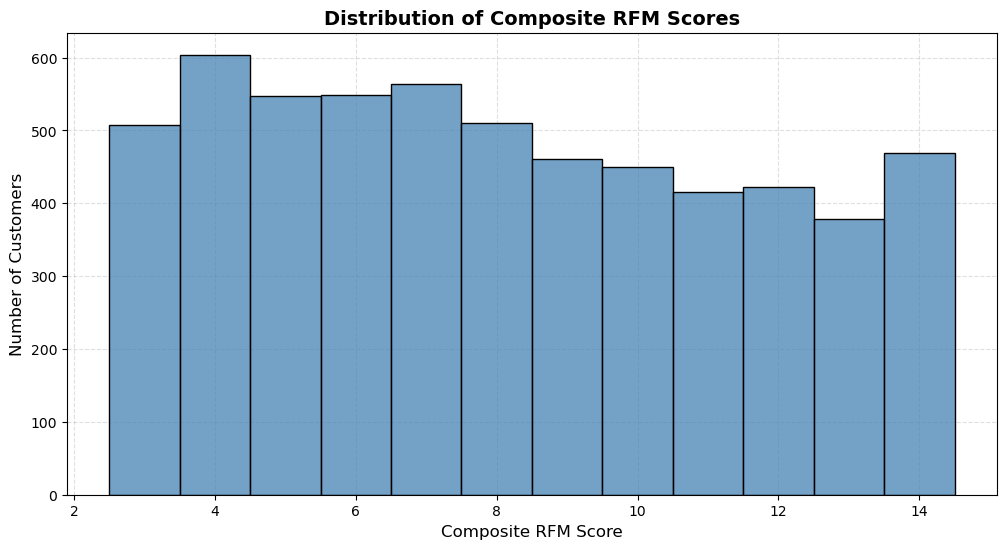

In [38]:
# Visualize composite RFM score distribution
plt.figure(figsize=(12, 6))
ax=sns.histplot(rfm_scored, x='RFM_score', bins=12, discrete=True, color='steelblue')

plt.xlabel('Composite RFM Score', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Distribution of Composite RFM Scores', fontsize=14, fontweight='bold')

plt.grid(True, ls='--', alpha=0.4)
ax.set_axisbelow(True)
plt.show()

The composite RFM score ranges from 3 (lowest engagement and value) to 14 (highest), with most customers clustered around the mid-range (mean and median ≈ 8). The distribution is broad, with the central half of customers scoring between 5 and 11, indicating that no single score level clearly separates high- and low-value customers.

While the composite score provides a convenient summary of behavior, it does not sharply distinguish customer states on its own. Therefore, segmentation is based on the underlying Recency, Frequency, and Monetary dimensions rather than score thresholds alone, allowing customers with similar total scores but different behavioral patterns to be assigned to more interpretable, action-oriented segments.

In [39]:
# RFM segment definition
def assign_rfm_segment(row):
    if row['R_score'] >= 4 and row['F_score'] >= 4 and row['M_score'] >= 4:
        return 'Champions'
    elif row['R_score'] >= 3 and row['F_score'] >= 4:
        return 'Loyal Customers'
    elif row['R_score'] <= 2 and row['F_score'] >= 3 and row['M_score'] >= 3:
        return 'At Risk (High Value)'
    elif row['R_score'] <= 2 and row['F_score'] <= 2:
        return 'Hibernating'
    elif row['R_score'] >= 4 and row['F_score'] <= 2:
        return 'New Customers'
    else:
        return 'Potential Loyalists'
    
rfm_scored['Segment'] = rfm_scored.apply(assign_rfm_segment, axis=1)

rfm_scored['Segment'].value_counts()

Segment
Hibernating             2064
Potential Loyalists     1532
New Customers            951
Champions                875
At Risk (High Value)     268
Loyal Customers          188
Name: count, dtype: int64

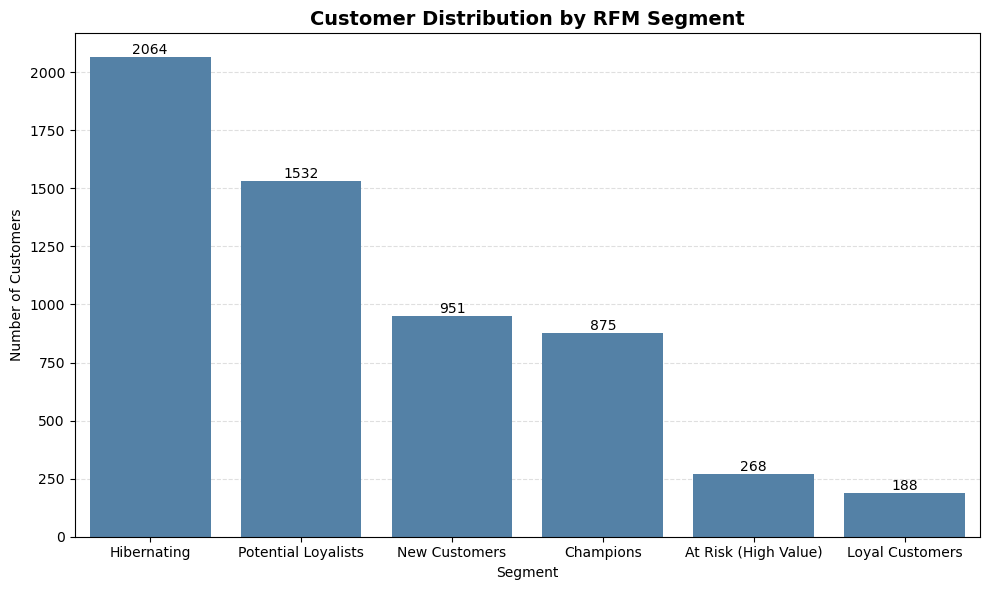

In [40]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(
    data=rfm_scored,
    x='Segment',
    order=rfm_scored['Segment'].value_counts().index,
    color='steelblue'
)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by RFM Segment', fontsize=14, fontweight='bold')

plt.grid(axis='y', ls='--', alpha=0.4)
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

In [41]:
# Segment-Level summary
segment_summary = (
    rfm_scored
    .groupby('Segment')
    .agg(
        Customers=('CustomerID', 'count'),
        Avg_Recency=('Recency', 'mean'),
        Avg_Frequency=('Frequency', 'mean'),
        Avg_Monetary=('Monetary', 'mean'),
        Avg_RFM_Score=('RFM_score', 'mean')
    )
    .sort_values('Avg_RFM_Score', ascending=False)
)
segment_summary

,Customers,Avg_Recency,Avg_Frequency,Avg_Monetary,Avg_RFM_Score
Segment,,,,,
Champions,875,17.822857,22.312000,12494.366176,13.450286
Loyal Customers,188,97.957447,13.372340,5385.282995,11.622340
At Risk (High Value),268,338.358209,8.615672,3854.466948,9.044776
Potential Loyalists,1532,82.163838,4.401436,1660.303157,9.007180
New Customers,951,26.568875,2.412198,1010.147299,8.358570
Hibernating,2064,439.726744,1.737403,611.043562,4.674903


The RFM segmentation reveals distinct behavioral groups with materially different engagement and revenue characteristics:

- **Champions:** recently active, frequent, high-spending customers driving a disproportionate share of the revenue
- **Loyal Customers:** consistent repeat buyers with strong retention potential but lower recency than Champions
- **At-Risk (High Value):** historically valuable customers with long inactivity periods
- **Potential Loyalists:** recently active customers with moderate purchase history and strong potential to become loyal
- **New Customers:** recently acquired with limited transaction history
- **Hibernating Customers:** inactive, low-frequency, low-value customers

These segments translate raw transaction data into actionable customer personas that can support targeted retention campaigns, differential pricing or discount strategies and CLV modeling and churn prediction.

This segmentation framework establishes who the customers are and how they differ behaviorally. In the next section, we will quantify segment-level revenue contribution and churn risk, and link RFM segments to customer lifetime value and pricing insights.

### 4.4 Segment-Level Value, Retention Risk, and Revenue Contribution

Having seen who the various groups of customers are, we will now proceed to investigate why they are important. This section shows that segments differ materially in revenue contribution, some small segments carry disproportionate business risk and CLV and retention efforts should not be uniform.

---

### 4.4.1 Segment Size vs Revenue Contribution

Not all customers contribute equally to business performance. While some segments may represent a large share of the customer base, others contribute disproportionately to total revenue.

This subsection quantifies the relationship between segment size and revenue contribution to identify which customer groups drive value, which represent latent risk, and where retention and pricing efforts should be prioritized.

In [42]:
# Merge segment labels back to transactional revenue
df_segment_revenue = (
    df_valid
    .merge(
        rfm_scored[['CustomerID', 'Segment']],
        on='CustomerID',
        how='left'))

# Compute segment-level revenue metrics
segment_revenue = (
    df_segment_revenue
    .groupby('Segment')
    .agg(
        Customers=('CustomerID', 'nunique'),
        Total_Revenue=('TotalAmount', 'sum'),
        Avg_Revenue_per_Customer=('TotalAmount', lambda x: x.sum() / x.nunique())).reset_index())

# Add share metrics
segment_revenue['Customer_Percent'] = ((segment_revenue['Customers'] / segment_revenue['Customers'].sum())*100)

segment_revenue['Revenue_Percent'] = ((segment_revenue['Total_Revenue'] / segment_revenue['Total_Revenue'].sum())*100)

# Sort by revenue contribution
segment_revenue = segment_revenue.sort_values(by='Revenue_Percent', ascending=False)

segment_revenue

,Segment,Customers,Total_Revenue,Avg_Revenue_per_Customer,Customer_Percent,Revenue_Percent
1,Champions,875,1.093257e+07,3180.846786,14.886016,61.614755
5,Potential Loyalists,1532,2.543584e+06,1765.152280,26.063287,14.335360
2,Hibernating,2064,1.261194e+06,1090.998194,35.113984,7.107949
0,At Risk (High Value),268,1.032997e+06,1001.937092,4.559374,5.821857
3,Loyal Customers,188,1.012433e+06,833.964747,3.198367,5.705961
4,New Customers,951,9.606501e+05,916.650841,16.178972,5.414117


In [43]:
# Helper function for currency formatting in visualizations
def format_currency(value):
    if value >= 1_000_000:
        return f'£{value/1_000_000:.1f}M'
    elif value >= 1_000:
        return f'£{value/1_000:.1f}K'
    else:
        return f'£{value:.0f}'

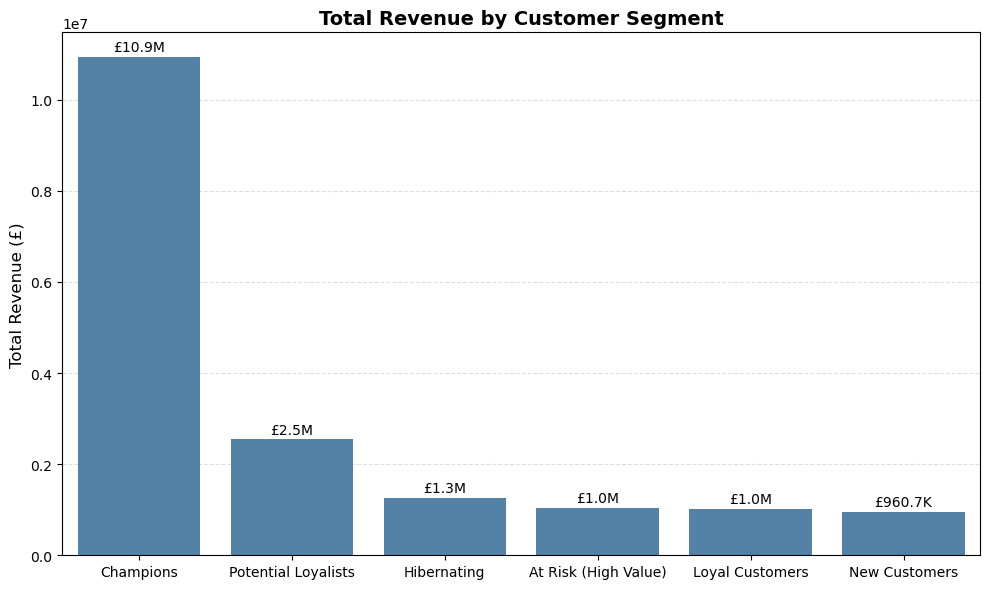

In [44]:
# Plot total revenue contribution
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=segment_revenue, x='Segment', y='Total_Revenue', color='steelblue')

plt.title('Total Revenue by Customer Segment', fontsize=14, fontweight='bold')
plt.ylabel('Total Revenue (£)', fontsize=12)
plt.xlabel('')

for container in ax.containers:
    labels = [format_currency(v.get_height()) for v in container]
    ax.bar_label(container, labels=labels, padding=2)

plt.grid(axis='y', ls='--', alpha=0.4)
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

Total revenue varies sharply across customer segments. Champions generate £10.9M in total revenue, accounting for around 62% of overall revenue despite representing only ~15% of the customer base. Potential Loyalists contribute about £2.5M (14%) while comprising 26% of customers, whereas Hibernating customers generate only £1.3M (7%) despite representing the largest segment (35%).

At-Risk (High Value) customers contribute roughly £1.0M (6%) from just 5% of customers, indicating high per-customer value but concentrated churn exposure. This visualization establishes absolute revenue contribution across segments, providing context for subsequent comparisons of customer share versus revenue share.

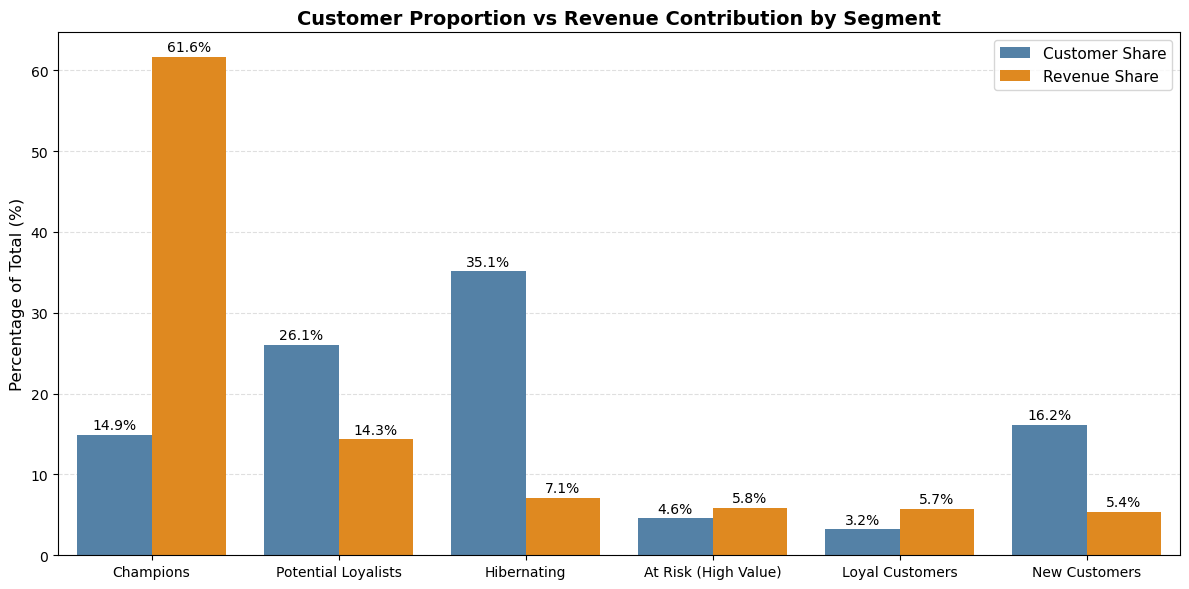

In [45]:
# Compare customer proportion vs revenue share
plot_df = segment_revenue.melt(
    id_vars='Segment',
    value_vars=['Customer_Percent', 'Revenue_Percent'],
    var_name='Metric',
    value_name='Percentage'
)

# Create readable legend labels
plot_df['Metric'] = plot_df['Metric'].map({
    'Customer_Percent': 'Customer Share',
    'Revenue_Percent': 'Revenue Share'
})

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=plot_df, 
    x='Segment', 
    y='Percentage', 
    hue='Metric', 
    palette=['steelblue', 'darkorange']
)

plt.xlabel('', fontsize=12)
plt.ylabel('Percentage of Total (%)', fontsize=12)
plt.title('Customer Proportion vs Revenue Contribution by Segment', 
          fontsize=14, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=2, fontsize=10)

plt.grid(axis='y', ls='--', alpha=0.4)
ax.set_axisbelow(True)

plt.legend(title='', fontsize=11)
plt.tight_layout()
#plt.savefig("customer_proportion_vs_revenue_contribution", dpi=300, bbox_inches="tight", facecolor='white')
plt.show()

Revenue contribution is highly concentrated across segments. Champions account for approximately 15% of customers (875 of 5,878) but contribute 62% of total revenue (£10.9M of £17.7M total), indicating extreme revenue concentration and high dependency on a relatively small customer base.

Conversely, segments such as Hibernating and New Customers represent a large share of customers but contribute disproportionately less revenue, highlighting a clear imbalance between customer volume and business value.

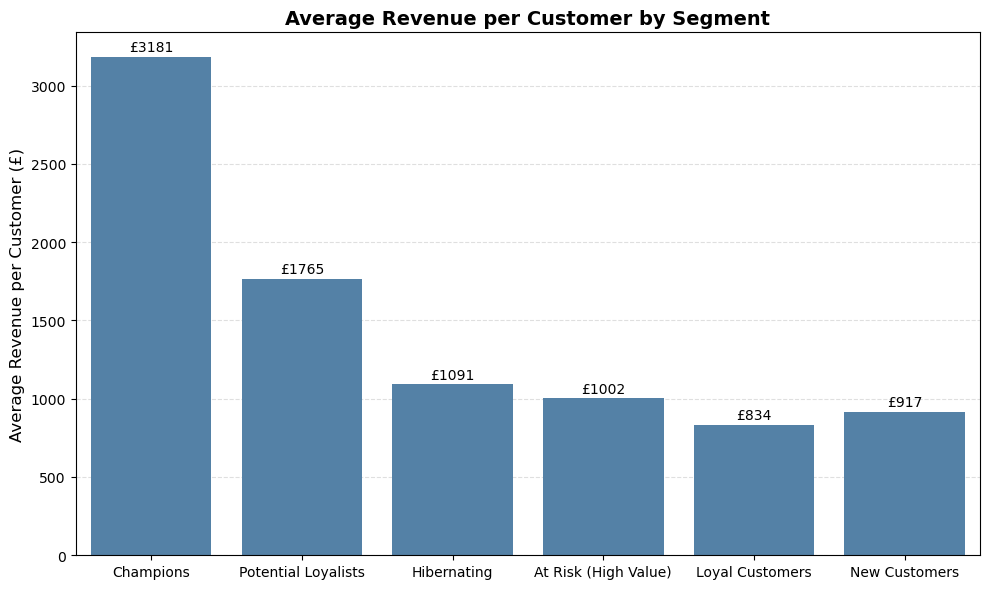

In [46]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=segment_revenue, x='Segment', y='Avg_Revenue_per_Customer', color='steelblue')

plt.xlabel('', fontsize=12)
plt.ylabel('Average Revenue per Customer (£)', fontsize=12)
plt.title('Average Revenue per Customer by Segment', fontsize=14, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container, fmt='£%.0f', padding=2)
    
plt.grid(axis='y', ls='--', alpha=0.4)
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

Average revenue per customer varies sharply across segments. Champions generate the highest value per customer (£3,181), reinforcing their importance not just in aggregate revenue but also in individual lifetime value.

Despite representing less than 5% of customers, At-Risk (High Value) customers contribute nearly 6% of total revenue(£1,033 per customer), making their potential churn disproportionately costly. This segment represents latent revenue risk rather 
than immediate revenue volume.

Revenue contribution varies sharply across customer segments and is not proportional to segment size. A small number of high-value segments account for a disproportionately large share of total revenue, while some of the largest segments by customer count contribute relatively less value on a per-customer basis.

Champions emerge as the most strategically important segment, combining both high per-customer value and outsized total revenue contribution. Potential Loyalists represent a sizeable segment with moderate value, suggesting meaningful upside through targeted engagement and conversion. In contrast, Hibernating customers account for a large share of the customer base but generate comparatively low revenue per customer.

Crucially, At-Risk (High Value) customers contribute meaningful revenue despite their small size, making them a priority for retention due to high churn risk.

This imbalance highlights that customer count alone is a poor proxy for business value. Treating all customers uniformly would result in inefficient allocation of marketing spend and increased exposure to revenue loss. These findings reinforce the need for segment-driven retention, pricing, and customer lifetime value strategies rather than one-size-fits-all approaches.

### 4.4.2 Segment-Level Retention Risk (Recency & Churn Exposure)

So far, the analysis has identified which customer segments generate the most value. However, revenue concentration alone is insufficient for effective decision-making: high-value customers only matter if they remain active. In transactional datasets without explicit churn labels, recency serves as a robust proxy for churn risk, with longer periods of inactivity indicating a higher probability of attrition.

By examining recency patterns and churn exposure across RFM segments, this subsection identifies which customer groups face the greatest risk of attrition and where targeted retention interventions are likely to deliver the highest return.

In [47]:
# Segment-level recency statistics
segment_recency = (
    rfm_scored
    .groupby('Segment')
    .agg(
        Customers=('CustomerID', 'count'),
        Avg_Recency=('Recency', 'mean'),
        Median_Recency=('Recency', 'median'),
        P75th_Recency=('Recency', lambda x: x.quantile(0.75))
    )
    .sort_values('Avg_Recency', ascending=False)
)
segment_recency

,Customers,Avg_Recency,Median_Recency,P75th_Recency
Segment,,,,
Hibernating,2064,439.726744,421.0,550.00
At Risk (High Value),268,338.358209,326.5,402.50
Loyal Customers,188,97.957447,89.0,116.25
Potential Loyalists,1532,82.163838,74.0,120.00
New Customers,951,26.568875,25.0,39.00
Champions,875,17.822857,13.0,27.00


In [48]:
# Define churn-risk threshold (90 days ~ 3 months of inactivity)
# This threshold is commonly used in retail to identify disengaged customers
churn_threshold = 90

rfm_scored['High_Churn_Risk'] = rfm_scored['Recency'] > churn_threshold

# Segment-level churn exposure
segment_churn_risk = (
    rfm_scored
    .groupby('Segment')
    .agg(
        Customers=('CustomerID', 'count'),
        High_Risk_Customers=('High_Churn_Risk', 'sum'),
        High_Risk_Percent=('High_Churn_Risk', 'mean')
    )
)

segment_churn_risk['High_Risk_Percent'] *= 100

segment_churn_risk_sorted = (
    segment_churn_risk
    .sort_values('High_Risk_Percent', ascending=False)
    .reset_index()
)
segment_churn_risk_sorted

,Segment,Customers,High_Risk_Customers,High_Risk_Percent
0,At Risk (High Value),268,268,100.000000
1,Hibernating,2064,2064,100.000000
2,Loyal Customers,188,91,48.404255
3,Potential Loyalists,1532,566,36.945170
4,Champions,875,0,0.000000
5,New Customers,951,0,0.000000


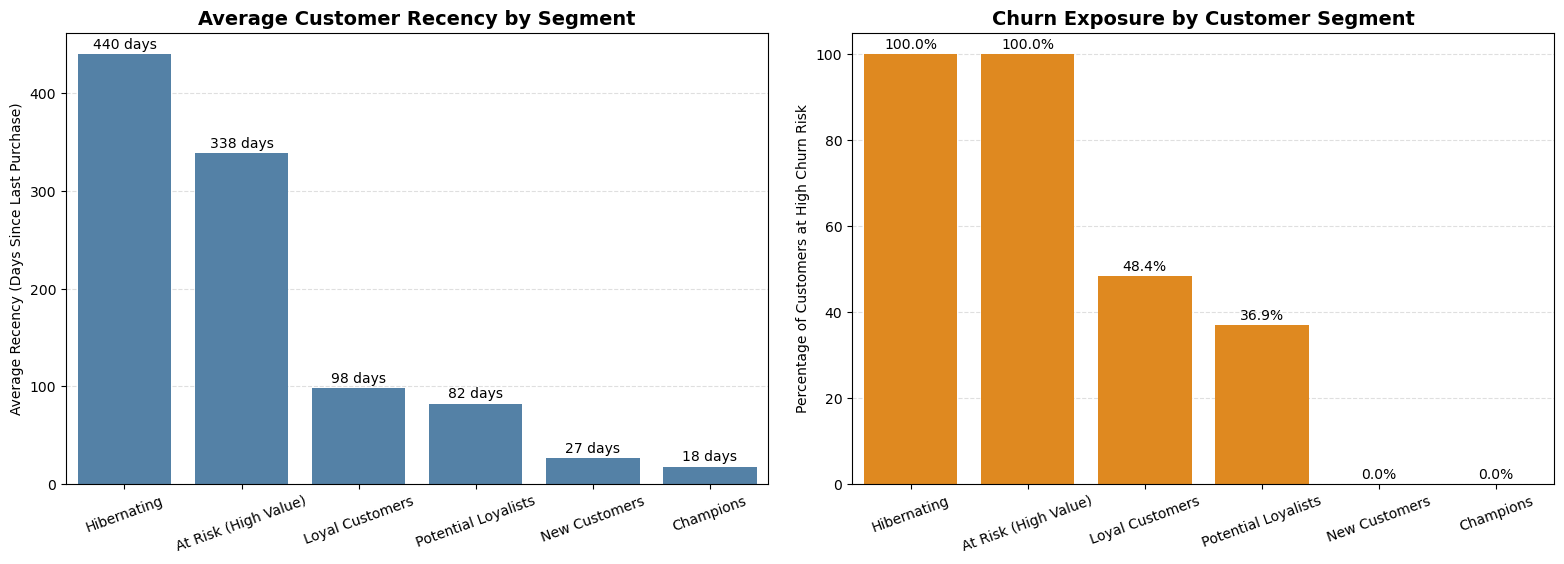

In [49]:
# Use recency ordering for both plots
segment_order = segment_recency.reset_index()['Segment']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Average Recency
ax1 = sns.barplot(
    data=segment_recency.reset_index(),
    x='Segment',
    y='Avg_Recency',
    order=segment_order,
    color='steelblue',
    ax=axes[0]
)

ax1.set_title('Average Customer Recency by Segment', fontsize=14, fontweight='bold')
ax1.set_xlabel('')
ax1.set_ylabel('Average Recency (Days Since Last Purchase)')

for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f days', padding=2)

ax1.tick_params(axis='x', rotation=20)
ax1.grid(axis='y', ls='--', alpha=0.4)
ax1.set_axisbelow(True)

# Plot 2: Churn Exposure
ax2 = sns.barplot(
    data=segment_churn_risk_sorted,
    x='Segment',
    y='High_Risk_Percent',
    order=segment_order,
    color='darkorange',
    ax=axes[1]
)

ax2.set_title('Churn Exposure by Customer Segment', fontsize=14, fontweight='bold')
ax2.set_xlabel('')
ax2.set_ylabel('Percentage of Customers at High Churn Risk')

for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', padding=2)

ax2.grid(axis='y', ls='--', alpha=0.4)
ax2.set_axisbelow(True)
ax2.tick_params(axis='x', rotation=20)
plt.tight_layout(pad=2)
plt.show()

Customer recency differs sharply across segments, indicating uneven exposure to churn risk across the customer base.

Hibernating and At-Risk (High Value) customers exhibit the longest periods of inactivity, signaling high churn probability. While Hibernating customers contribute relatively little revenue, At-Risk (High Value) customers combine long inactivity with historically strong monetary contribution, making their potential churn disproportionately costly.

In contrast, Champions and New Customers show very low average recency, reflecting recent engagement and lower immediate churn risk. Loyal Customers and Potential Loyalists occupy an intermediate position, suggesting stable engagement but requiring monitoring to prevent future decay.

When recency is translated into churn exposure using a 90-day inactivity threshold, churn risk is shown to be highly concentrated rather than evenly distributed. Entire segments such as At-Risk (High Value) and Hibernating customers exceed the threshold, while Champions and New Customers exhibit negligible exposure.

These findings indicate that retention strategies should be value-weighted rather than volume-driven. Preventing churn among a small number of high-value, inactive customers can protect a disproportionately large share of future revenue, whereas broad reactivation of low-value inactive customers is likely to yield diminishing returns.

This risk-value asymmetry motivates integrating churn probability into lifetime value estimation in the next section.

### 4.4.3 Segment-Level CLV Estimation

Up to this point, we have shown who generates value (revenue concentration) and who is at risk of churning (recency & churn exposure). Customer lifetime value (CLV) connects these dimensions by estimating the expected future value of each segment if current behavioral patterns persists. This allows prioritization of retention spend, discounting strategies, pricing flexibility, and customer success efforts.

However, because this analysis relies on transactional data without cost information, acquisition spend, or survival modeling, we adopt a historical CLV proxy rather than a fully predictive lifetime value estimate. This approach is transparent, defensible, and appropriate for segment-level decision support.

We define CLV using average order value, purchase frequency, and a recency-based retention adjustment. Since average order value multiplied by frequency equals total historical monetary value, this proxy effectively discounts past spend by recency to approximate forward-looking value.

In [50]:
# Define AOV factor
rfm_scored['AOV'] = rfm_scored['Monetary'] / rfm_scored['Frequency']

# Define a simple retention factor
rfm_scored['Retention_Factor'] = 1 / (1 + rfm_scored['Recency'])

# Compute CLV proxy
# Note: AOV * Frequency = Monetary, so this simplifies to Monetary * Retention_Factor
rfm_scored['CLV_proxy'] = (rfm_scored['AOV'] * rfm_scored['Frequency'] * rfm_scored['Retention_Factor'])

In [51]:
# Segment-Level aggregation
segment_clv = (
    rfm_scored
    .groupby('Segment')
    .agg(
        Customers=('CustomerID', 'count'),
        Avg_CLV=('CLV_proxy', 'mean'),
        Total_CLV=('CLV_proxy', 'sum'),
        Avg_Recency=('Recency', 'mean')
    )
    .sort_values('Total_CLV', ascending=False)
)
segment_clv

,Customers,Avg_CLV,Total_CLV,Avg_Recency
Segment,,,,
Champions,875,2499.893670,2.187407e+06,17.822857
New Customers,951,151.550253,1.441243e+05,26.568875
Potential Loyalists,1532,74.606218,1.142967e+05,82.163838
Loyal Customers,188,60.557585,1.138483e+04,97.957447
Hibernating,2064,1.667966,3.442682e+03,439.726744
At Risk (High Value),268,12.026323,3.223055e+03,338.358209


Customer lifetime value (CLV) integrates historical spending, purchasing behavior, and retention likelihood into a single forward-looking metric. In the absence of explicit churn labels or cost data, we estimate a behavioral CLV proxy based on 
recency-discounted historical revenue.

CLV varies sharply across segments and is not proportional to segment size. Champions exhibit the highest average CLV, reflecting frequent purchasing, high spend, and strong recent engagement. Although relatively small in number, they represent the most valuable and stable customer base.

At-Risk (High Value) customers display very low average estimated CLV despite strong historical spending. Increased recency and sharply reduced retention potential significantly depress their forward-looking value, indicating that without timely 
reactivation, much of their historical value is unlikely to be realized.

Notably, Potential Loyalists exhibit higher estimated CLV than At-Risk (High Value) customers, underscoring that future value is more sensitive to engagement and recency than to historical spend alone. In contrast, Hibernating customers show consistently low estimated CLV, indicating limited return from aggressive retention investment.

The following visualizations quantify these differences at both segment and per-customer levels.

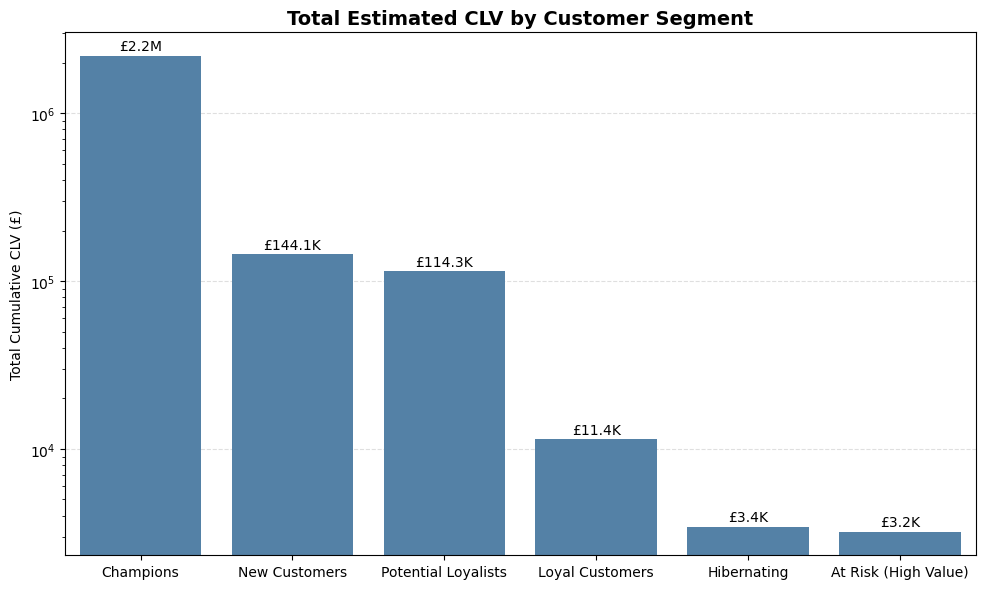

In [52]:
# Visualize total CLV contribution by segment
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=segment_clv.reset_index(), x='Segment', y='Total_CLV', color='steelblue')

plt.title('Total Estimated CLV by Customer Segment', fontsize=14, fontweight='bold')
plt.ylabel('Total Cumulative CLV (£)') 
plt.xlabel('')

for container in ax.containers:
    labels = [format_currency(v.get_height()) for v in container]
    ax.bar_label(container, labels=labels, padding=2)
    
plt.grid(axis='y', ls='--', alpha=0.4)
ax.set_axisbelow(True)
plt.yscale('log') # Log scale due to extreme differences
plt.tight_layout()
plt.show()

Total estimated CLV varies dramatically across segments. Champions account for approximately £2.2M in cumulative estimated lifetime value, representing the dominant share of projected future revenue despite comprising only ~15% of the customer base. In contrast, At-Risk (High Value) customers contribute just £3.2K in total estimated CLV—nearly a 700 times difference—despite their strong historical revenue performance.

This extreme dispersion indicates that future value is driven primarily by engagement and recency rather than historical spending alone. Log scaling is required to visualize the full range of values due to the magnitude gap between Champions and all other segments.

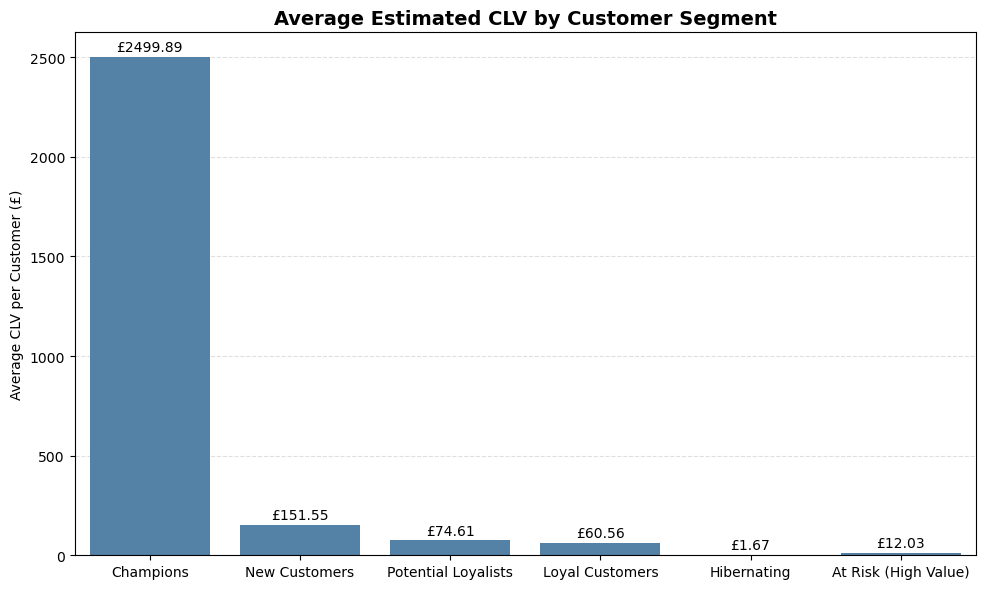

In [53]:
# Average CLV by customer segment (per customer value explanation)
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=segment_clv.reset_index(), x='Segment', y='Avg_CLV', color='steelblue')

plt.title('Average Estimated CLV by Customer Segment', fontsize=14, fontweight='bold')
plt.ylabel('Average CLV per Customer (£)')
plt.xlabel('')

for container in ax.containers:
    ax.bar_label(container, fmt='£%.2f', padding=2)
    
plt.grid(axis='y', ls='--', alpha=0.4)
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

Average CLV per customer reinforces the strategic importance of Champions. Each Champion represents approximately £2,500 in expected future value, compared with £12 for At-Risk customers and £1.67 for Hibernating customers—a ~200 times per-customer value gap. This disparity underscores why retention strategies must be value-weighted rather than volume-driven.

### 4.5 Pricing & Revenue Optimization Implications by Segment

Up to this point, the analysis has established who drives revenue (Pareto & segments), how customers behave (frequency, volume, AOV), who is at risk (recency & churn exposure), and where future value lies (segment-level CLV).

This section therefore answers the final operational question: How should pricing, discounts, and revenue levers differ by customer segment to maximize long-term profitability?

Rather than applying uniform pricing or promotions across the customer base, we examine how pricing sensitivity and revenue drivers differ by segment, enabling value-weighted and risk-aware pricing decisions.

### 4.5.1 Segment-Level Revenue Drivers: Frequency vs AOV

This matters because revenue can grow through higher order frequency, higher average order value (AOV) or both. Understanding which lever dominates by segment determines whether pricing actions should focus on discounts, bundles, minimum order thresholds or loyalty incentives.

In [54]:
# Create a concise segment summary
segment_pricing = (
    rfm_scored
    .groupby('Segment')
    .agg(
        Avg_Frequency=('Frequency', 'mean'),
        Avg_AOV=('AOV', 'mean'),
        Avg_Monetary=('Monetary', 'mean'),
        Avg_Recency=('Recency', 'mean')
    )
    .sort_values('Avg_Monetary', ascending=False)
)

print(segment_pricing)

                      Avg_Frequency     Avg_AOV  Avg_Monetary  Avg_Recency
Segment                                                                   
Champions                 22.312000  459.286542  12494.366176    17.822857
Loyal Customers           13.372340  402.797555   5385.282995    97.957447
At Risk (High Value)       8.615672  410.615882   3854.466948   338.358209
Potential Loyalists        4.401436  381.964173   1660.303157    82.163838
New Customers              2.412198  432.327406   1010.147299    26.568875
Hibernating                1.737403  348.163466    611.043562   439.726744


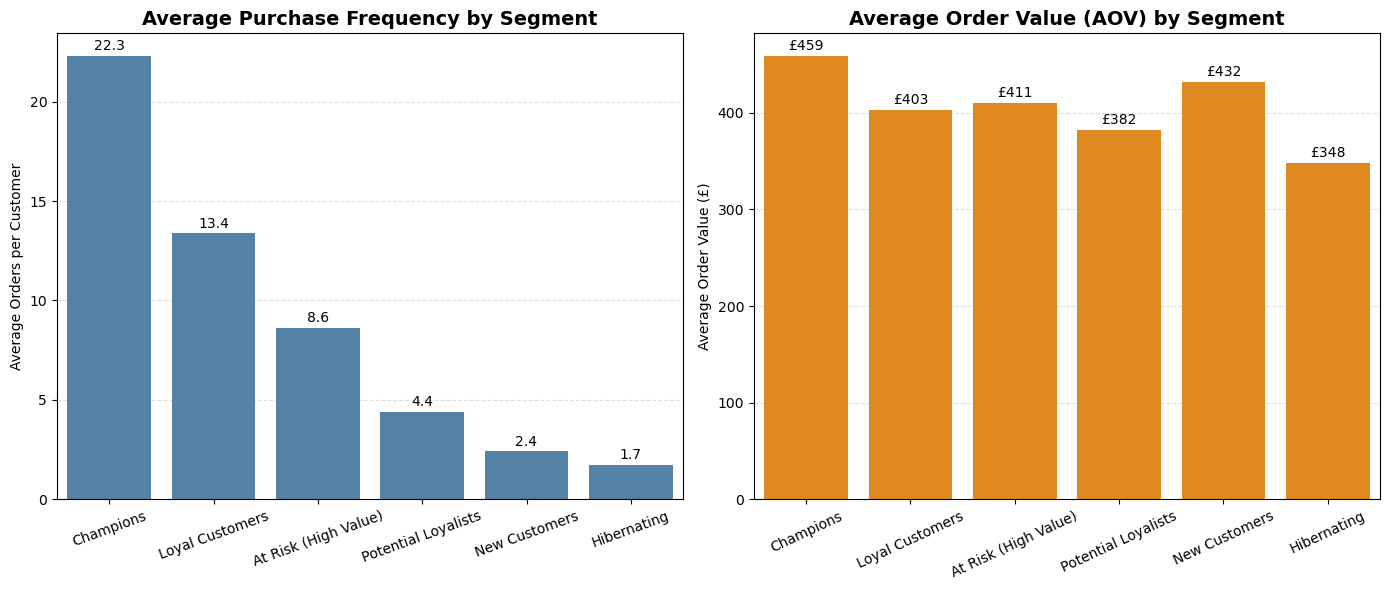

In [55]:
# Visualize revenue drivers by segment
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Frequency
ax1 = sns.barplot(data=segment_pricing.reset_index(), 
                  x='Segment', y='Avg_Frequency',
                  color='steelblue', ax=axes[0])
ax1.set_title('Average Purchase Frequency by Segment', fontsize=14, fontweight='bold')
ax1.set_xlabel('')
ax1.set_ylabel('Average Orders per Customer')
ax1.tick_params(axis='x', rotation=20)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f', padding=2)
ax1.grid(axis='y', ls='--', alpha=0.4)
ax1.set_axisbelow(True)

# Plot 2: AOV
ax2 = sns.barplot(data=segment_pricing.reset_index(), 
                  x='Segment', y='Avg_AOV',
                  color='darkorange', ax=axes[1])
ax2.set_title('Average Order Value (AOV) by Segment', fontsize=14, fontweight='bold')
ax2.set_xlabel('')
ax2.set_ylabel('Average Order Value (£)')
ax2.tick_params(axis='x', rotation=25)
for container in ax2.containers:
    ax2.bar_label(container, fmt='£%.0f', padding=2)
ax2.grid(axis='y', ls='--', alpha=0.4)
ax2.set_axisbelow(True)

plt.tight_layout()
plt.show()

Champions generate value primarily through high frequency rather than extreme AOV. In contrast, At-Risk (High Value) customers show historically high AOV but collapsing purchase frequency. Potential Loyalists show moderate AOV with scalable frequency, while Hibernating customers show neither frequency nor AOV leverage.

This confirms that revenue optimization should target frequency uplift for engaged customers and re-engagement for high-AOV but inactive customers, rather than blanket price cuts.

Revenue generation patterns differ fundamentally across segments:

**Champions (Frequency-Driven Revenue):** Generate value through exceptional purchase frequency (22.3 orders vs 1.7-13.4 for others), representing 13 times the frequency of Hibernating customers. While AOV is elevated (£459), frequency is the primary differentiator.

**At-Risk, New Customers (AOV Without Frequency):** At-Risk customers show high AOV (£411) comparable to Champions, but frequency has collapsed to 8.6 orders. New Customers show similar AOV (£432) but haven't established frequency patterns. Both segments demonstrate spending capacity but lack engagement.

**Potential Loyalists, Loyal Customers (Balanced Drivers):** Show moderate frequency (4.4 and 13.4 orders) with moderate AOV (£382-£403). These segments have headroom for frequency growth without requiring AOV increase.

**Hibernating (Neither Lever Active):** Low frequency (1.7 orders) and lowest AOV (£348), indicating minimal revenue generation capacity.

Revenue optimization should target frequency uplift for engaged but moderate-value customers (Potential Loyalists), protect existing frequency for high-value customers (Champions, Loyal), and re-engage high-AOV but inactive customers (At-Risk) through targeted incentives rather than blanket discounts.

### 4.5.2 Pricing Sensitivity Implications by Segment

This dataset does not contain experimental price variation, so price elasticity cannot be estimated causally. Instead, we infer relative pricing sensitivity from observed purchasing structure (AOV, frequency, and recency).

High-frequency, low-AOV customers likely exhibit stronger price sensitivity (retail behavior), while low-frequency, high-AOV customers suggest lower price sensitivity (wholesale or premium purchasing). Additionally, customers with stable engagement despite price exposure demonstrate revealed preference for the offering beyond price.

To visualize these behavioral patterns, we examine the relationship between frequency and AOV across segments:

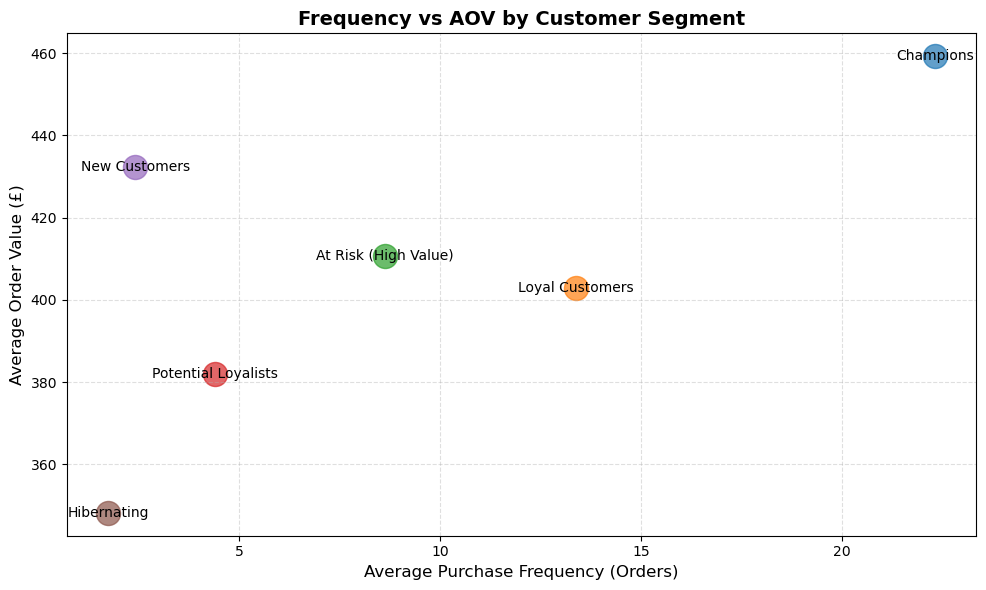

In [56]:
# Analyze frequency vs AOV relationship by segment
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot with segment labels
for segment in segment_pricing.index:
    row = segment_pricing.loc[segment]
    ax.scatter(row['Avg_Frequency'], row['Avg_AOV'], s=300, alpha=0.7)
    ax.annotate(segment, 
                (row['Avg_Frequency'], row['Avg_AOV']),
                fontsize=10, 
                ha='center',
                va='center')

ax.set_xlabel('Average Purchase Frequency (Orders)', fontsize=12)
ax.set_ylabel('Average Order Value (£)', fontsize=12)
ax.set_title('Frequency vs AOV by Customer Segment', fontsize=14, fontweight='bold')
ax.grid(True, ls='--', alpha=0.4)
plt.tight_layout()
plt.show()

The frequency-AOV relationship reveals distinct purchasing behaviors:

**Champions (High Frequency + High AOV):** Both levers drive revenue. Frequency dominates (22 orders vs 2-8 for others), but AOV is also elevated (£459 vs £350-£430 for most segments). These customers demonstrate strong engagement and spending power, suggesting low price sensitivity.

**At-Risk, New Customers (Low Frequency + High AOV):** Revenue from infrequent but valuable orders. At-Risk customers show £411 AOV but only 8.6 orders with 338 days recency, indicating disengagement despite historical value. New Customers show similar AOV (£432) but lack frequency track record.

**Potential Loyalists, Loyal Customers (Moderate Frequency + Moderate AOV):** Balanced revenue drivers. These segments show growth potential through frequency increase without requiring AOV uplift.

**Hibernating (Low Frequency + Low AOV):** Neither lever active. Limited revenue potential without fundamental behavior change.

**Pricing Sensitivity Implications:**

Segments with high frequency demonstrate revealed preference and habitual purchasing, suggesting lower price sensitivity and higher discount risk (margin erosion without volume gains). Conversely, infrequent purchasers may require targeted incentives to increase engagement frequency, making strategic discounting more justifiable when CLV potential is high. 

Overall, from the scatter plot above, segments cluster into distinct revenue-generation regimes: frequency-driven (Champions), AOV-driven but fragile (At-Risk), and scalable mid-tier (Potential Loyalists), reinforcing the need for differentiated pricing actions.

### 4.5.3 Value-Weighted Pricing Strategy Framework

Based on segment-level CLV, churn exposure, and purchasing patterns, we construct a differentiated pricing strategy framework. The core principle is that discount depth should increase with CLV-at-risk, not with inactivity alone.

The table below summarizes the strategic posture by segment:

| Segment              | CLV       | Churn Risk | Pricing Implication   |
| -------------------- | ----------| ---------- | --------------------- |
| Champions            | Very High | Low        | Protect margin        |
| At-Risk (High Value) | High      | Very High  | Aggressive win-back offers |
| Potential Loyalists  | Medium    | Medium     | Conversion incentives |
| Loyal Customers      | Medium    | Low        | Volume incentives |
| New Customers        | Low       | Low        | Onboarding nudges |
| Hibernating          | Very Low  | Very High  | Minimal spend |

Pricing optimization cannot be one-size-fits-all. Customer segments differ fundamentally in revenue generation patterns, engagement stability, and value fragility. Effective revenue optimization requires aligning pricing actions with segment-level CLV, engagement patterns, and churn exposure. Discounting should be treated as an investment with measurable expected return, not as a blanket tactic.

**Segment-Level Priorities:**

- **Champions (£12,494 average value):** Protect margin through non-price rewards—unnecessary discounts erode profitability  without increasing engagement

- **At-Risk (£3,854):** Aggressive reactivation justified by high CLV-at-risk; delay risks permanent value loss

- **Loyal Customers (£5,385):** Maintain engagement through volume-based incentives (threshold rewards, subscription offers) while protecting core profitability

- **Potential Loyalists (£1,660):** Strategic investment to convert moderate engagers into loyal, high-frequency customers through time-bound offers

- **New Customers (£1,010 avg value):** Focus on second-purchase conversion and habit formation; avoid aggressive discounting that trains price sensitivity

- **Hibernating (£611):** Minimal spend—low CLV × high inactivity = poor retention ROI

The expected return from retaining one At-Risk (High Value) customer (£3,854) is 6.3 times higher than a Hibernating customer (£611), justifying aggressive, targeted win-back incentives for At-Risk, while limiting broad discounting to Hibernating. 

Reactivating just 10% of At-Risk customers (27 of 268) preserves approximately £103K in future revenue—equivalent to acquiring 102 new average customers at £1,010 each. This 3.8 times efficiency advantage demonstrates why retention investment should prioritize high-value inactive customers over high-volume acquisition efforts.

Resource allocation should prioritize high CLV-at-risk segments (At-Risk, Potential Loyalists) over high-volume but low-value segments (Hibernating), ensuring pricing strategies maximize long-term profitability rather than short-term transaction volume.

## 5. Business Recommendations and Strategic Implementation

Having established customer segmentation, quantified segment-level value and churn risk, and constructed a differentiated pricing framework, this section synthesizes key findings into actionable recommendations with clear implementation priorities and expected impact.

---

### 5.1 Key Findings

Analysis of 805,549 transactions from 5,942 customers reveals extreme revenue concentration and heterogeneous customer behavior requiring segment-specific strategies:

- **Revenue concentration:** 15% of customers (Champions) generate 62% of revenue (£10.9M)
- **Multi-dimensional value:** Similar revenue arises from different behavioral patterns—Champions leverage frequency (22 orders), At-Risk show high AOV (£411) but collapsed engagement
- **Concentrated churn risk:** At-Risk segment represents £1.0M revenue (6%) with 100% churn exposure; valuable customers face disproportionate attrition risk
- **CLV variation:** CLV varies 20 times across segments (£12,494 Champions vs £611 Hibernating), driven jointly by historical spend and engagement recency
- **Pricing implications:** Uniform pricing would misallocate resources and erode margin without improving retention

These findings validate the need for value-weighted retention, segment-specific pricing, and CLV-driven resource allocation. Customer count alone is a poor proxy for business value—retention and pricing decisions must be targeted by segment.

---

### 5.2 Strategic Recommendations

Recommendations are prioritized by expected return on investment (ROI), combining segment-level revenue contribution, churn risk, and estimated customer lifetime value. Resources are focused on segments where intervention yields the highest return relative to implementation cost and risk.

#### 1. At-Risk (High Value)

268 customers representing £1.0M revenue (6% of total) face 100% churn risk with average inactivity exceeding 90 days. Deploy personalized win-back offers, time-sensitive incentives, and direct outreach to top-value customers, targeting 30% reactivation. The expected impact could lead to ~ £250K net gain (subject to campaign response variability).

---

#### 2. Champions

875 Champions generate £10.9M (62% of revenue) with low churn risk but potential margin erosion from unnecessary discounting. Audit current discount exposure and replace price-based promotions with non-monetary loyalty perks (early access, VIP benefits, tiered rewards). The expected impact could lead to 5% margin improvement which is equal to £545K additional profit (assuming a conservative 10% baseline margin; illustrative).

---

#### 3. Loyal Customers

188 Loyal Customers contribute £1.0M (5.7%) with £5,385 average value and stable engagement (13.4 orders avg). While 48% show moderate churn risk (98 days recency), their proven loyalty and high frequency make them prime candidates for volume-based growth. Deploy threshold incentives ("Spend £X, save Y"), subscription offers, and replenishment programs to increase basket size and order frequency. Expected impact could lead to 15% revenue lift, equivalent to £150K incremental.

---

#### 4. Potential Loyalists

1,532 moderately engaged customers (4 orders avg, 82 days recency) show strong frequency upside. Deploy time-bound frequency incentives, personalized recommendations, and graduated loyalty tiers to increase purchase frequency. The expected impact could lead to 20% frequency lift = £500K incremental revenue.

---

#### 5. New Customers

951 New customers require second-purchase conversion focus. Implement automated post-purchase engagement sequences and moderate onboarding incentives while avoiding aggressive discounting that trains price sensitivity. The expected impact could lead to 25% improvement in activation rate, long-term LTV uplift.

---

#### 6. Hibernating

2,064 Hibernating customers (35% of base) contribute only £1.3M (7%) with £611 average value. Limit to broad, low-cost campaigns; allow natural attrition and reallocate resources to higher-ROI segments. The expected impact could lead to <£100K recovery. This segment should be managed for cost efficiency rather than growth, freeing resources for higher-return opportunities. 

Combined estimated impact is £1.45M+ in revenue preservation, margin improvement, and incremental growth, with Priority 1-4 interventions delivering 92% of total value.

## 6. Implementation Considerations and Limitations

Executing this framework requires automated monthly RFM segmentation with churn alerts for customers exceeding 90-day inactivity, campaign attribution tracking to measure revenue recovery by intervention, A/B testing infrastructure for segment-specific pricing strategies, and CLV monitoring dashboards tracking realized vs predicted lifetime value. Technical implementation requires segment definitions codified in SQL/Python, integrated CRM tracking, and real-time alerting for At-Risk transitions.

This analysis is based on historical transactional data and therefore reflects behavioral proxies rather than causal effects. Key limitations include: no experimental price variation (elasticity inferred, not measured), no explicit churn labels (90-day threshold used), no cost/margin data (profit optimization estimates directional only), and CLV calculated as historical proxy rather than predictive survival model.

Future work should prioritize: A/B testing of pricing and retention tactics by segment to measure causal effects, survival-based CLV modeling for probabilistic churn prediction, margin-adjusted CLV to optimize profit rather than revenue, cohort retention analysis to model engagement decay patterns, and product affinity analysis to inform cross-sell and bundling strategies.

Despite these limitations, the segmentation and strategic recommendations presented here are robust, interpretable, and directly actionable given the available data.

## 7. Conclusion

This analysis demonstrates that customer value in online retail is highly concentrated, behaviorally heterogeneous, and unevenly exposed to churn risk—requiring segment-specific strategies rather than uniform approaches in order to maximize long-term profitability.

Key strategic imperatives:

1. Prioritize interventions by ROI: prevent At-Risk (High Value) churn through targeted reactivation (£250K opportunity)

2. Protect Champions margin by replacing discounts with non-price loyalty mechanisms (£545K opportunity)

3. Grow Loyal Customers through volume-based incentives and engagement maintenance (£150K opportunity)

4. Convert Potential Loyalists through frequency-building incentives (£500K opportunity)

4. Optimize New Customer activation to establish long-term purchasing habits

Total expected impact of £1.45M+ in revenue preservation, margin improvement, and incremental growth.

Revenue growth is more efficiently achieved by protecting and reactivating high-value customers than expanding the low-value base. Retention spending should be CLV-weighted, not volume-driven: reactivating one At-Risk customer (£3,854 value) preserves revenue equivalent to acquiring 3.8 new customers (£1,010 each), demonstrating superior ROI from value-targeted retention.

By aligning retention investment, pricing strategies, and resource allocation with segment-level CLV and churn risk, the business can shift from reactive, uniform tactics to proactive, value-weighted strategies that improve both customer lifetime value and overall profitability. The RFM-based segmentation framework, CLV estimation methodology, and differentiated pricing roadmap provide a data-driven foundation for immediate implementation and ongoing optimization.

### Appendix

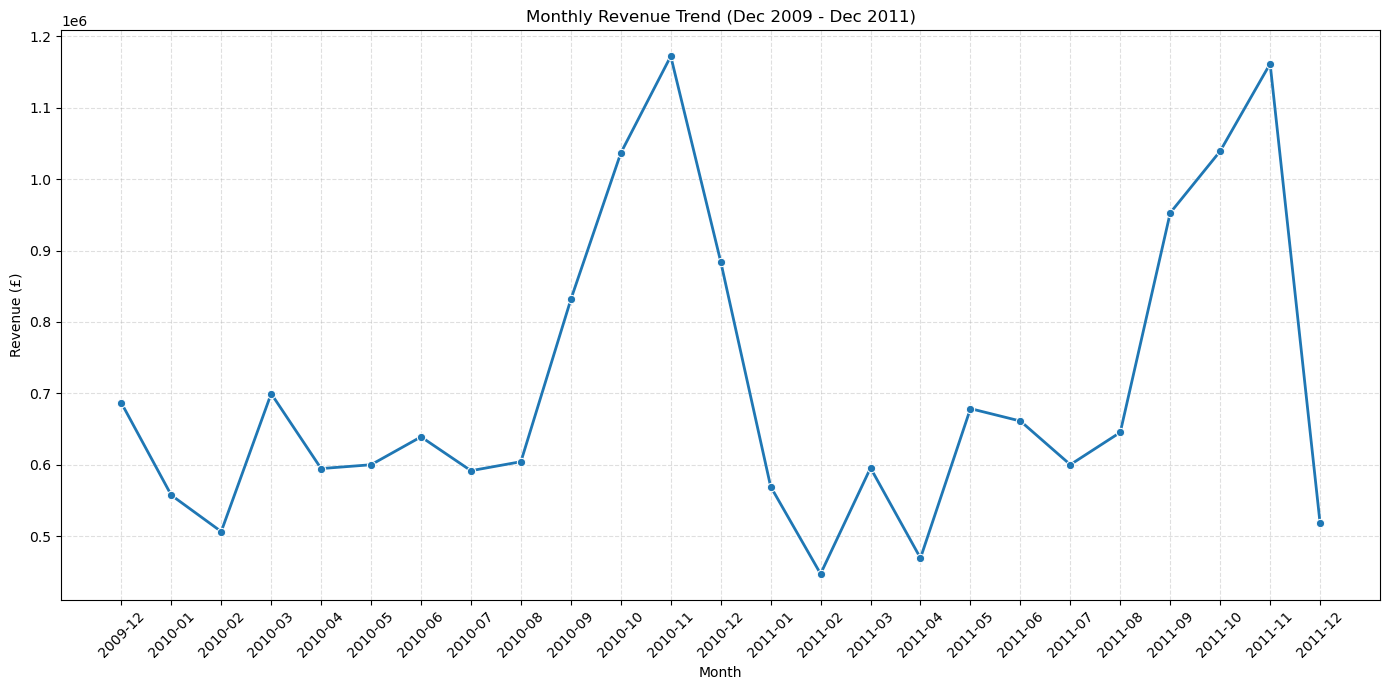

In [57]:
# Monthly revenue trends
monthly_revenue = df_valid.groupby('YearMonth')['TotalAmount'].sum().reset_index()
monthly_revenue['YearMonth'] = monthly_revenue['YearMonth'].astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(monthly_revenue, x='YearMonth', y='TotalAmount', marker='o', linewidth=2)

plt.xlabel('Month')
plt.ylabel('Revenue (£)')
plt.title('Monthly Revenue Trend (Dec 2009 - Dec 2011)')

plt.xticks(rotation=45)
plt.grid(True, ls='--', alpha=0.4)
plt.tight_layout()
plt.show()

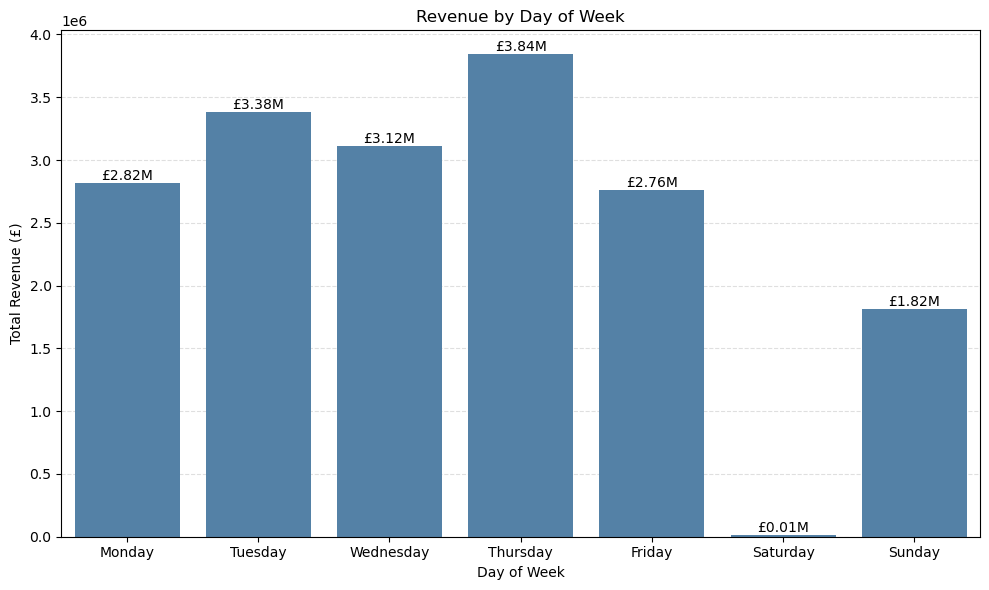

In [58]:
# Weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Aggregate revenue
weekday_revenue = df_valid.groupby('Weekday', as_index=False)['TotalAmount'].sum()

plt.figure(figsize=(10, 6))
ax=sns.barplot(data=weekday_revenue, x='Weekday', y='TotalAmount', order=weekday_order, color='steelblue')

plt.xlabel('Day of Week')
plt.ylabel('Total Revenue (£)')
plt.title('Revenue by Day of Week')

for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'£{v/1e6:.2f}M' for v in container.datavalues])

plt.grid(axis='y', ls='--', alpha=0.4)
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

## Tableau

### Dataset 1: Customer-Level Table 

In [59]:
tableau_customers = rfm_scored[[
    'CustomerID',
    'Segment',
    'Recency',
    'Frequency',
    'Monetary',
    'AOV',
    'RFM_score',
    'CLV_proxy',
    'High_Churn_Risk'
]]

tableau_customers.to_csv("tableau_customers.csv", index=False)

### Dataset 2: Segment-Level Summary

In [60]:
tableau_segments = segment_revenue.merge(
    segment_clv[['Avg_CLV','Total_CLV']],
    on='Segment'
)

tableau_segments.to_csv("tableau_segments.csv", index=False)

In [61]:
monthly_revenue.to_csv("tableau_monthly_revenue.csv", index=False)